<div class="alert alert-block alert-success">
    <h1 style="margin-bottom:0.5cm"><b>LAB 5: Classification</b></h1>
    <p style="margin-bottom:0.25cm">Course 240317: <b>Data Analysis in Rehabilitation</b>
    <br>
        Master in Neuroengineering and Rehabilitation</p>
    <b>Prof. Joan F. Alonso</b>
    <br>
    <br>
</div>

# Introduction

<div class="alert alert-block alert-info">
    <p>In this lab session, we will:</p>
    <ul>
        <li><b>Use several <samp>sklearn</samp> classifiers on a toy dataset, plot decision boundaries, performance measures and curves (ETC: 60 min)</b></li>
            <ul>
                <li>LDA</li>
                <li>Naive Bayes</li>
                <li>Logistic regression</li>
                <li>k-NN</li>
                <li>Decision tree</li>
                <li>Support vector classifier</li>
            </ul>
        <li><b>Work on a real dataset (ETC: 90 to 180 min)</b></li>
            <ul>
                <li>Exploratory data analysis</li>
                <li>Fit and evaluate classifiers</li>
                <li>Try an unbalanced problem</li>
            </ul>
    </ul>
</div>


Before we start, we should have added the `Yellowbrick` package, which will help us a lot to include nice visualizations in our machine learning workflow. Make sure you have an up-to-date version (`YellowBrick 1.3` or higher) to avoid issues with the latest versions of `scikit-learn`.

If not, stop this notebook, go to the terminal window and run `conda install -c conda-forge yellowbrick` to update or add it to the currently active **conda** environment.

Also, add the `openpyxl` module to be able to load data from Excel files: `conda install openpyxl`.

And then, of course, open this notebook again.

# Classifiers with  `scikit-learn` (and the famous irises)

<div>
    <br>
    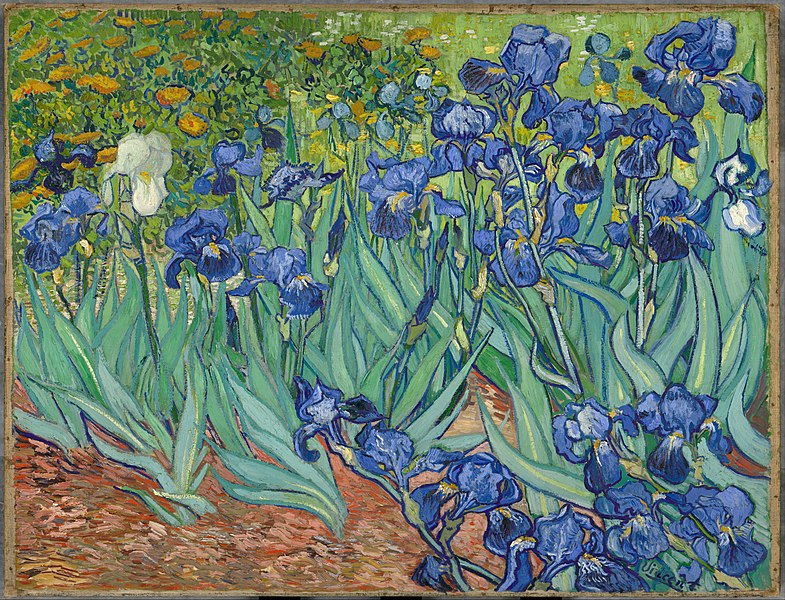
</div>

For a moment, forget about neuroengineering and rehabilitation. Imagine that we have some friends who are expert botanists and who are able to distinguish clearly between these three types of irises:
<div>
    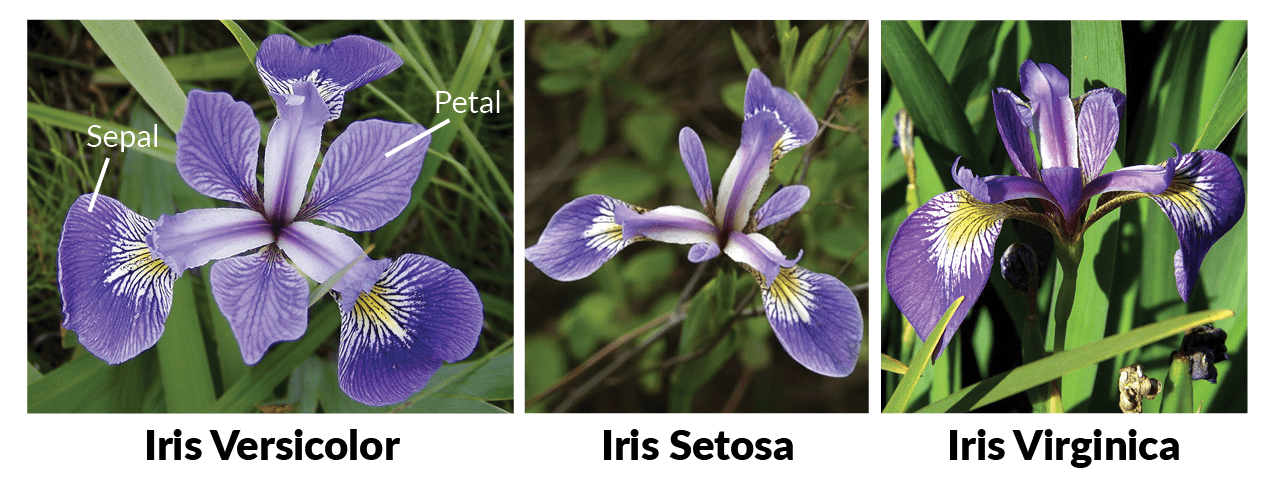
</div>

Their trained eye is able to assess the subtle differences in petals and sepals, but they have also methodically built a comprehensive dataset with 150 instances of these species that include measurements of these sepals and petals.

Imagine that our friends ask us to build a model that would help everybody distinguish between these three species. 

_Can we do it?_ Let's explore some **classifiers** available in `scikit-learn`.

## Objectives
In classification problems, we face two typical questions:
- **Prediction**. Given a new instance, how accurately can we predict its class?
- **Inference**. Which predictors (features) can effectively help with the prediction?

So without further ado, let's code!

## Load libraries and dataset
The [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) is perhaps the [best known dataset in the field of machine learning](https://doi.org/10.1111/j.1469-1809.1936.tb02137.x). The same way regression can be considered the _Hello World_ of learning algorithms, this is the _Hello World_ of datasets and it has nice characteristics:
- **150 instances, no missing data**
- **4 features**:
  - sepal length (cm)
  - sepal width  (cm)
  - petal length (cm)
  - petal width (cm)
- **3 classes of 50 instances each** (balanced class distribution), each class refers to a type of iris
- **Only one class is linearly separable** from the other 2

This dataset presents a very simple problem, suitable for learning, making **data preparation almost unnecessary**.<br>
Let's load everything we need:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from pathlib import Path


SOURCE_PATH = Path().resolve()
DATA_PATH = SOURCE_PATH / "Data"
OUTPUT_PATH = SOURCE_PATH / "Output" / "Lab5"
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

data = pd.read_csv(DATA_PATH / "240317-05-iris.csv",
                   names=["SL", "SW", "PL", "PW", "Type"])

Let's take a look at the data:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Type    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data.describe()

SL          SW          PL          PW
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

In [4]:
data.groupby('Type').size()

Type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
data.iloc[1:149:10]

SL   SW   PL   PW             Type
1    4.9  3.0  1.4  0.2      Iris-setosa
11   4.8  3.4  1.6  0.2      Iris-setosa
21   5.1  3.7  1.5  0.4      Iris-setosa
31   5.4  3.4  1.5  0.4      Iris-setosa
41   4.5  2.3  1.3  0.3      Iris-setosa
51   6.4  3.2  4.5  1.5  Iris-versicolor
61   5.9  3.0  4.2  1.5  Iris-versicolor
71   6.1  2.8  4.0  1.3  Iris-versicolor
81   5.5  2.4  3.7  1.0  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
101  5.8  2.7  5.1  1.9   Iris-virginica
111  6.4  2.7  5.3  1.9   Iris-virginica
121  5.6  2.8  4.9  2.0   Iris-virginica
131  7.9  3.8  6.4  2.0   Iris-virginica
141  6.9  3.1  5.1  2.3   Iris-virginica

### Train-test splitting
Now, we can **split** the dataset into a **training set** and a **test set**.

We could also use a **cross-validation approach to reduce bias and variance**, but for now we will just use the **hold-out approach** (for example 60% training, 40% test), but taking into account to include the same amount of samples for each of the three classes (doing what is called **stratified hold-out**).

<div class="alert alert-block alert-info">
    <p>Remember that <strong>it is also common to have a <i>validation set</i></strong>, which is used to:</p>
        <ul>
            <li>evaluate the performance of each classifier</li>
            <li>fine-tune parameters</li>
            <li> and determine the best model</li>
        </ul>
    <p>When using a validation set, the <strong>test set is mainly used for final reporting</strong>.</p>
    <p>However, due to the small size of this dataset, we can simplify it by using the test set to serve the purpose of the validation set as well.</p>
</div>

In [6]:
# Divide dataset into train and test subsets
train, test = train_test_split(
    data, test_size=0.4, stratify=data['Type'], random_state=42)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


## Exploratory data analysis
After splitting, we can go ahead and explore the training data. We will use `seaborn` (based on matplotlib) for that.

### Histograms
Initially, we can think of plotting **feature histograms for each class**:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


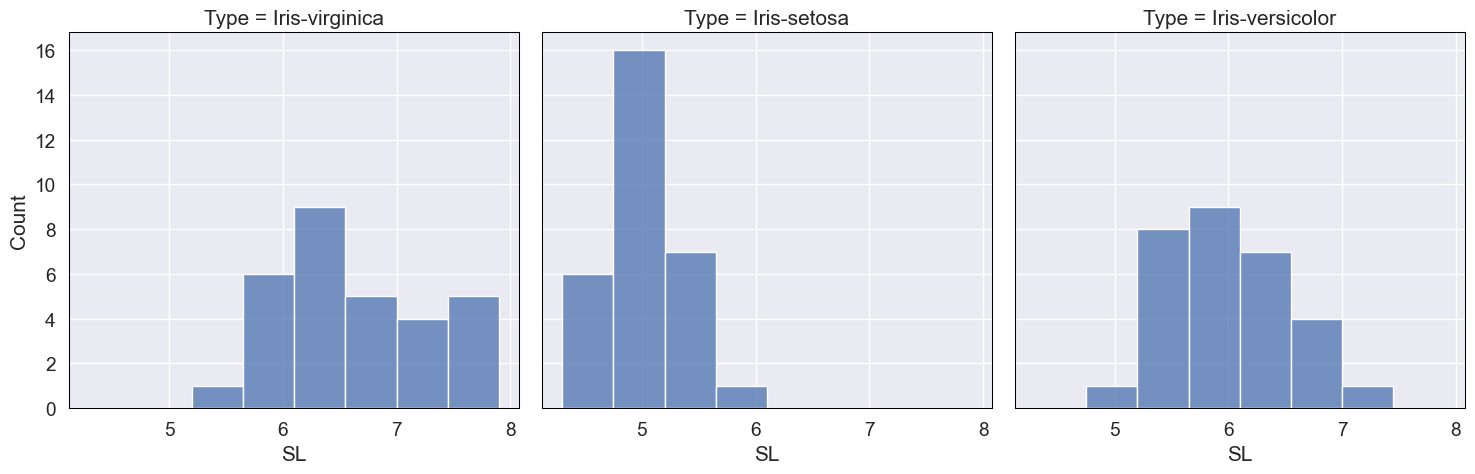

In [7]:
# Set plotting style
sns.set(context="notebook",
        font_scale=1.25,
        style="darkgrid",
        rc={'lines.linewidth': 1.5,
            'axes.linewidth': 0.75,
            'axes.edgecolor': 'black',
            'axes.axisbelow': True,
            })
# Plot histograms
sns.displot(train,
            x="SL",
            col="Type",
            multiple="dodge",
            facet_kws={'despine': False});

A similar plot that allows us to compare them is the **joint-histogram plot**:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


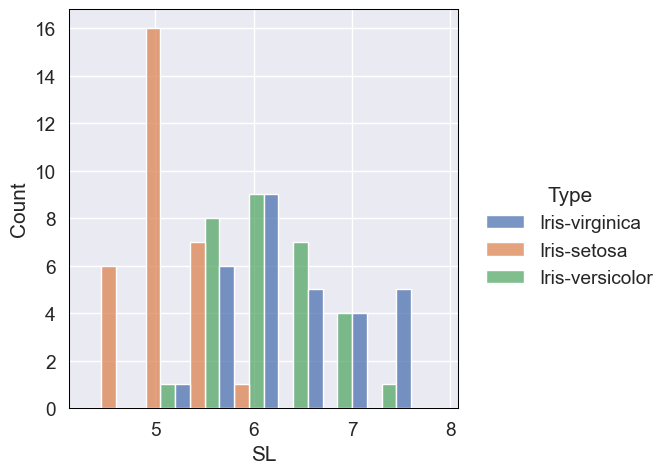

In [8]:
sns.displot(train, x="SL", hue="Type", multiple="dodge",
            facet_kws={'despine': False});

### Density estimation

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


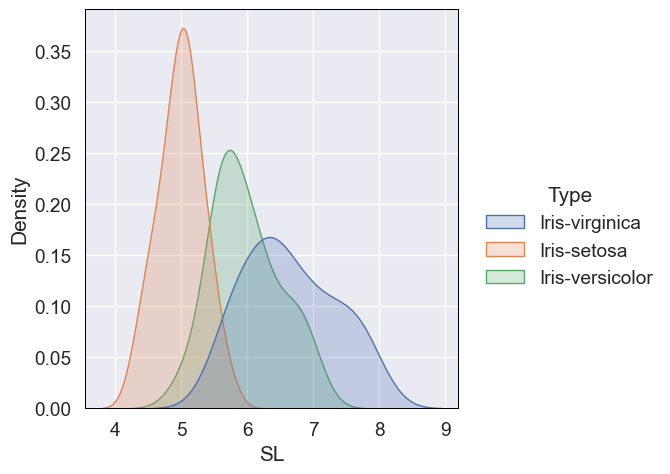

In [9]:
sns.displot(train, x="SL", hue="Type", kind="kde",
            fill=True, facet_kws={'despine': False});

We can try visualizing bivariate distributions:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


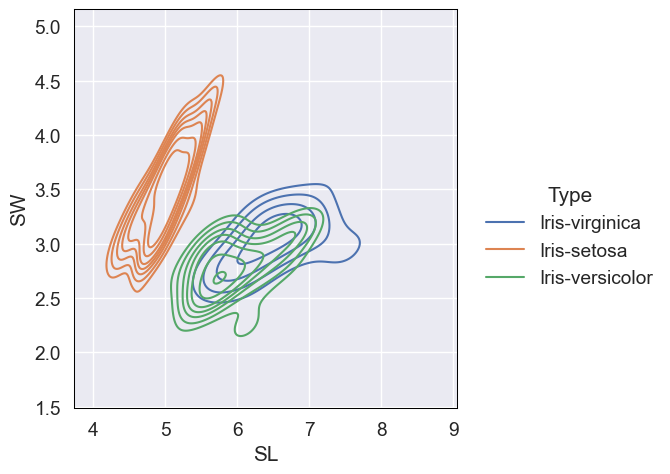

In [10]:
sns.displot(train, x="SL", y="SW", hue="Type",
            kind="kde", thresh=.25, levels=8,
            facet_kws={'despine': False});

`seaborn` can show a lot of information in a single plot. For example, we can show bivariate densities and marginal distributions:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

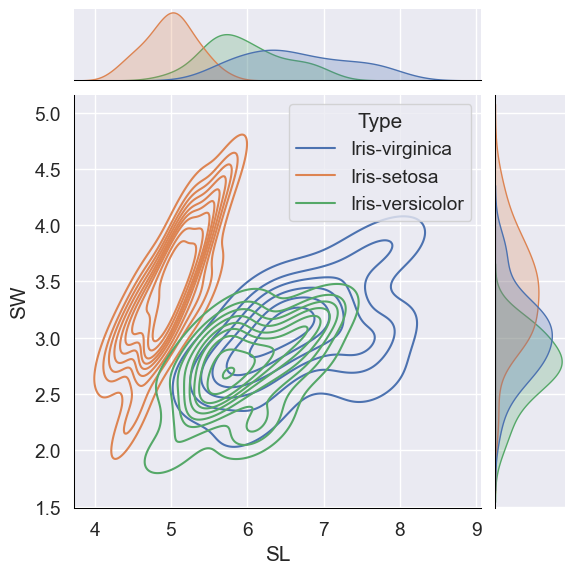

In [11]:
sns.jointplot(data=train,
              x="SL",
              y="SW",
              hue="Type",
              kind="kde",
              marginal_kws={'fill': True});

And we can further tune the plots:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

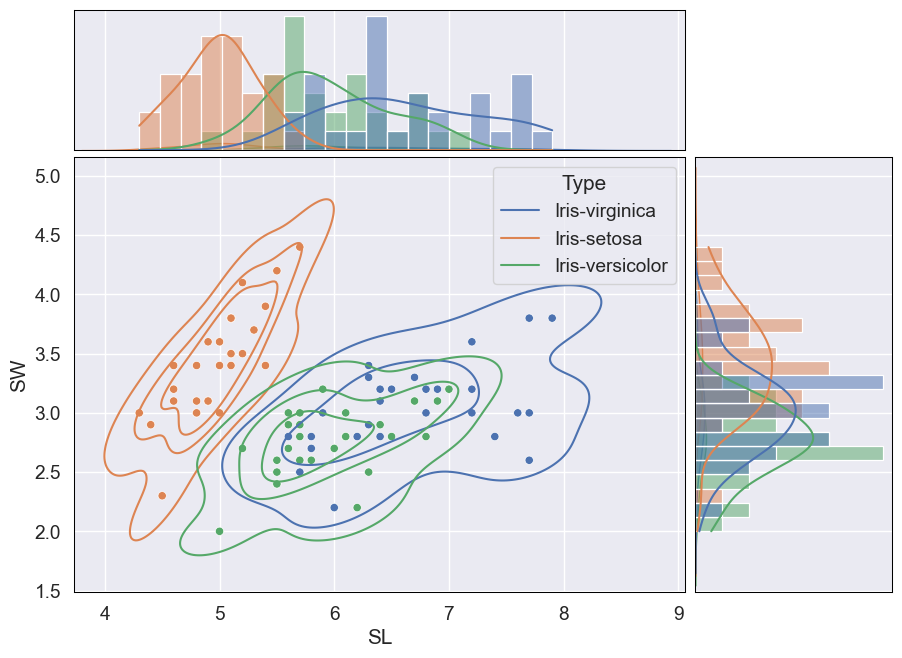

In [12]:
g = sns.jointplot(data=train, x="SL", y="SW", hue="Type", ratio=3, space=0.05)
g.plot_joint(sns.kdeplot, levels=4)
g.plot_marginals(sns.histplot, bins=20, kde=True)
sns.despine(top=False, right=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

### Multiple distributions
If we have to plot a lot of distributions, most of the time we take advantage of the `pairplot()`:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

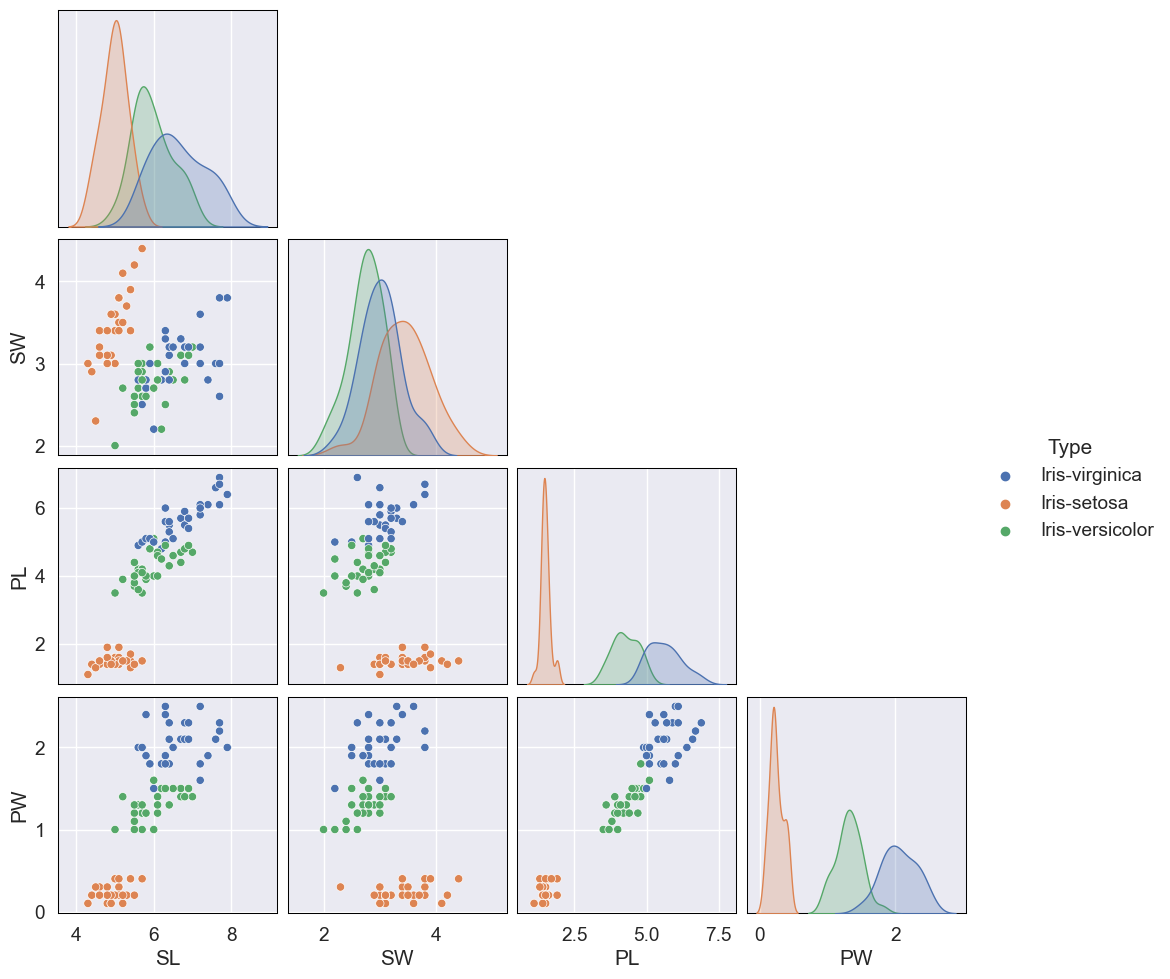

In [13]:
sns.pairplot(train, hue="Type", corner=True, grid_kws={'despine': False});

`pairplot()` returns a `PairGrid` object that gives us more flexibility to customize the plot:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

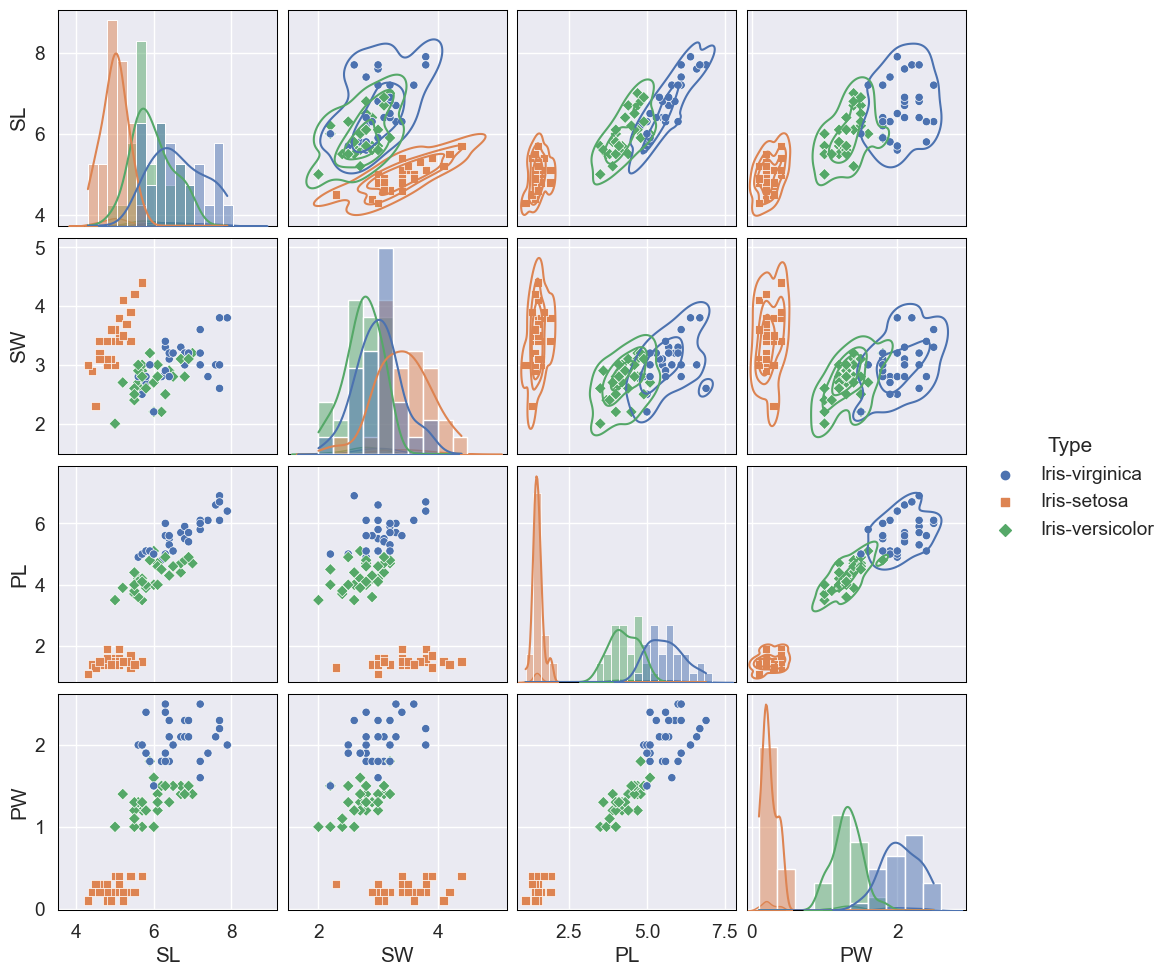

In [14]:
g = sns.pairplot(train,
                 hue="Type",
                 markers=["o", "s", "D"],
                 grid_kws={'despine': False})
g.map_upper(sns.kdeplot, levels=4)
g.map_diag(sns.histplot, binwidth=0.25, kde=True, fill=True);

Quan veus algun tipus de relació, que els punts no estan repartits aleatoriament veus que els parametres son proporcionals. En aquest cas, si tinguessim un problema complex podriem eliminar una variable.

<div class="alert alert-block alert-info">
    <p>Note that some variables seem to be <b>highly correlated</b>, for example <i>petal length (PL)</i> and <i>petal width (PW)</i>.</p>
    <p>In addition, the petal measurements separate the different species better than the sepal ones.</p>
</div>

### Correlation matrix
Next, let’s make a correlation matrix to examine the relationship between variables quantitatively:

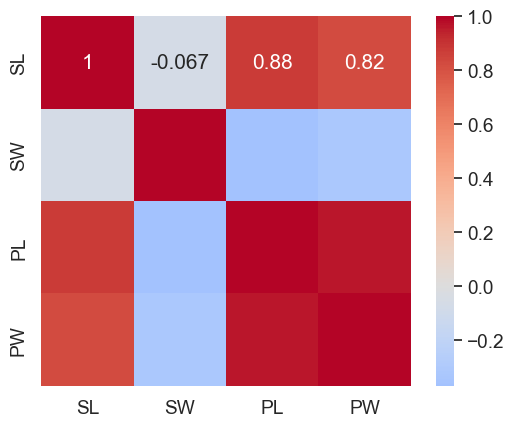

In [15]:
corrmat = train.corr(numeric_only=True)
sns.heatmap(corrmat, annot=True, square=True, cmap="coolwarm", center=0);

<div class="alert alert-block alert-info">
    <p>As we were suspecting, the petal measurements have a <b>high positive correlation</b>, while the sepal measurements are uncorrelated.</p>
    <p>Petal features are also <b>highly correlated</b> with sepal length.</p>
</div>

### Parallel coordinate plots

Another cool tool for visualization is the **parallel coordinate plot**, which represents all features (rows in the dataset) as a line. Although `pandas` also has this kind of plot, we will use the [visualizer available in `yellowbrick`](https://www.scikit-yb.org/en/latest/api/features/pcoords.html):

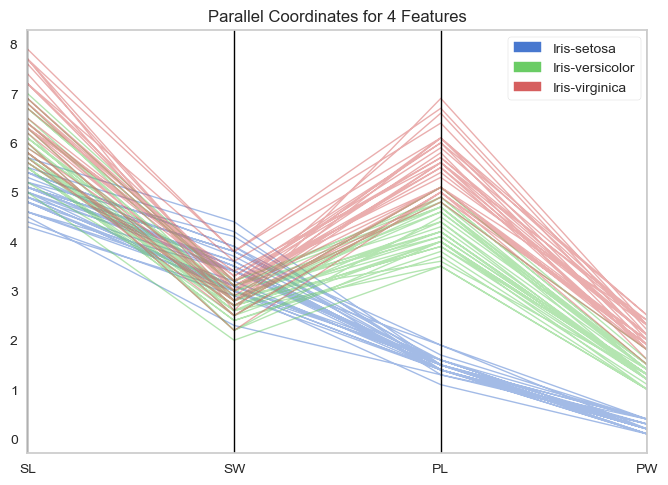

In [16]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.style import set_palette
set_palette('sns_muted')


# Instantiate the visualizer
visualizer = ParallelCoordinates(features=train.columns[0:-1],
                                 fast=True)
# Fit and transform the data to the visualizer
visualizer.fit_transform(train.iloc[:, 0:-1], train.iloc[:, -1])
# Finalize the title and axes then display the visualization
visualizer.show();

So, as we have seen before, petal features can separate species better than sepal ones.

## Build classifiers
We are now ready to start building some classifiers!
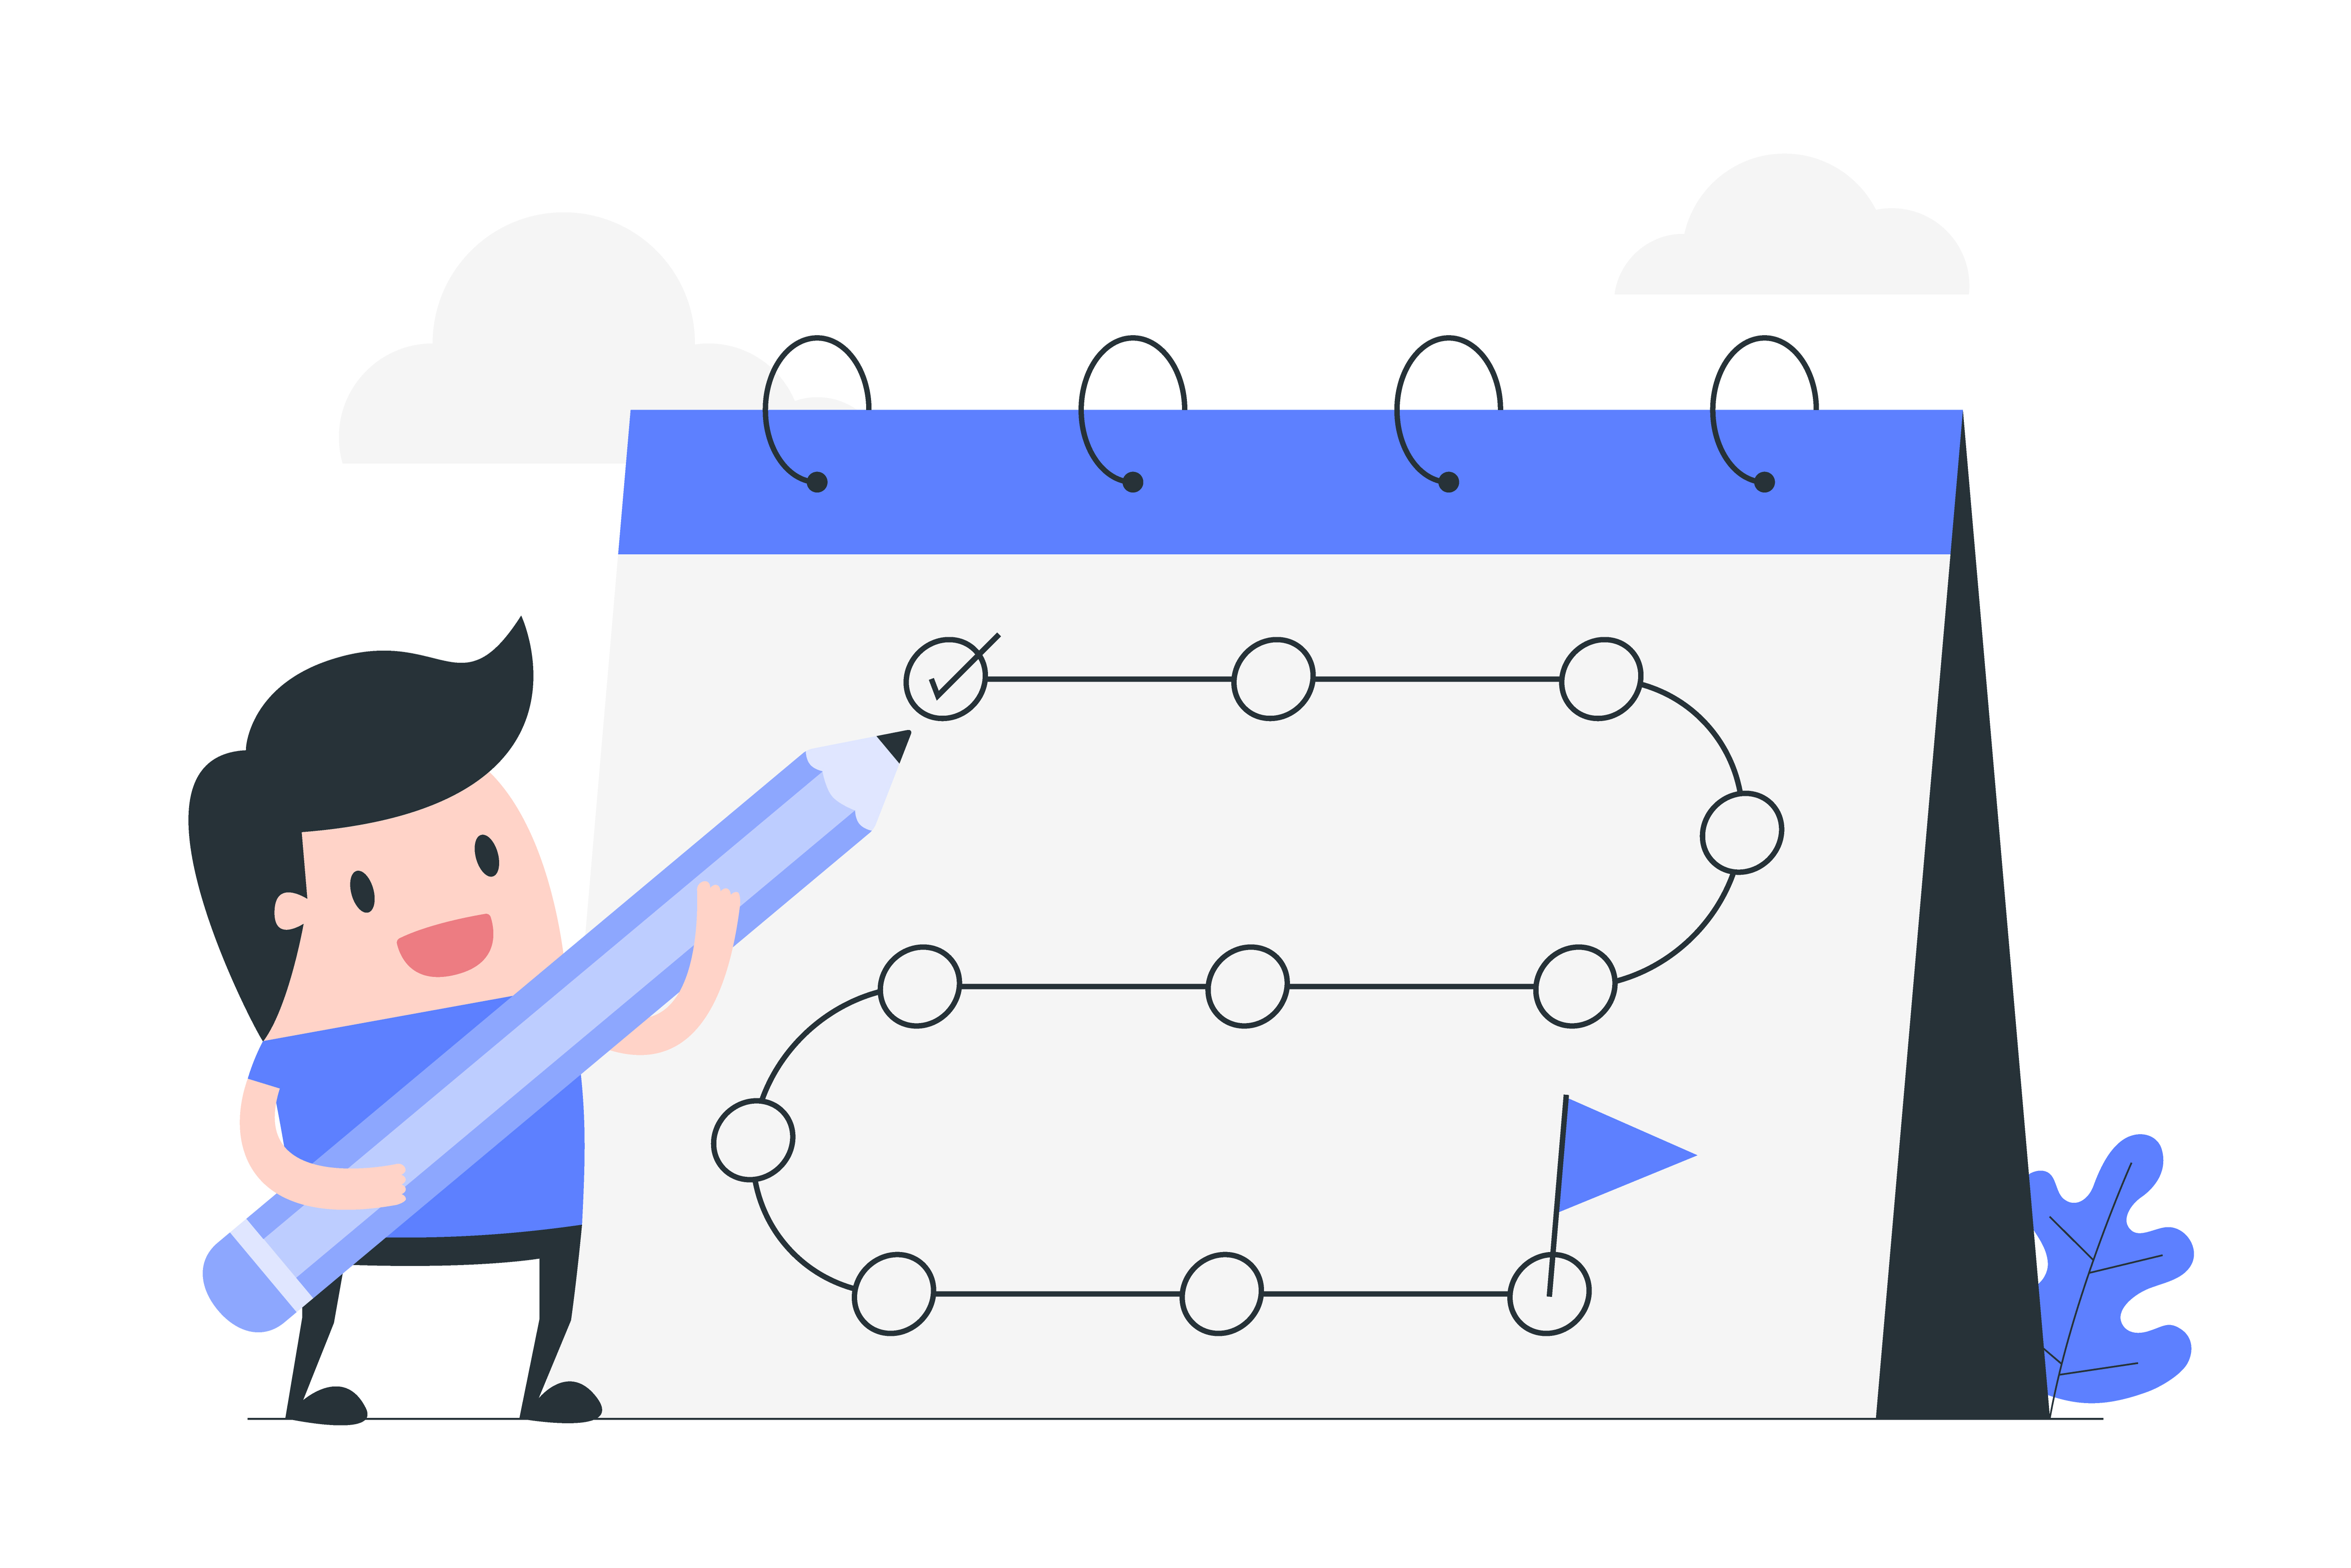

First, let's make our life a bit easier by separating features and class labels:

In [17]:
X_train = train[['SL', 'SW', 'PL', 'PW']]
y_train = train.Type
X_test = test[['SL', 'SW', 'PL', 'PW']]
y_test = test.Type

<div class="alert alert-block alert-danger">
    <p><strong>We should standardise the features!</strong> This is a step that we are skipping for the sake of simplicity and because the <i>iris dataset</i> works very well even without standardisation.</p><br>
    <strong>But don't forget to apply it in other datasets!</strong>
</div>

### LDA (4 features)

In [18]:
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)
# Average scores
print("LDA performance on test data\n",
      f"- Accuracy:  {metrics.accuracy_score(y_test, y_pred):.4f}\n",
      f"- Precision: {metrics.precision_score(y_test, y_pred, average='weighted'):.4f}\n",
      f"- Recall:    {metrics.recall_score(y_test, y_pred, average='weighted'):.4f}\n",
      f"- F1 score:  {metrics.f1_score(y_test, y_pred, average='weighted'):.4f}\n",
      )
# Scores for each class
print("LDA precision on test data for each class: "
      "{:.4f} {:.4f} {:.4f}".format(*metrics.precision_score(y_test, y_pred, average=None)))

LDA performance on test data
 - Accuracy:  0.9833
 - Precision: 0.9841
 - Recall:    0.9833
 - F1 score:  0.9833

LDA precision on test data for each class: 1.0000 0.9524 1.0000


We can find a better way of reporting performance using `yellowbrick`:

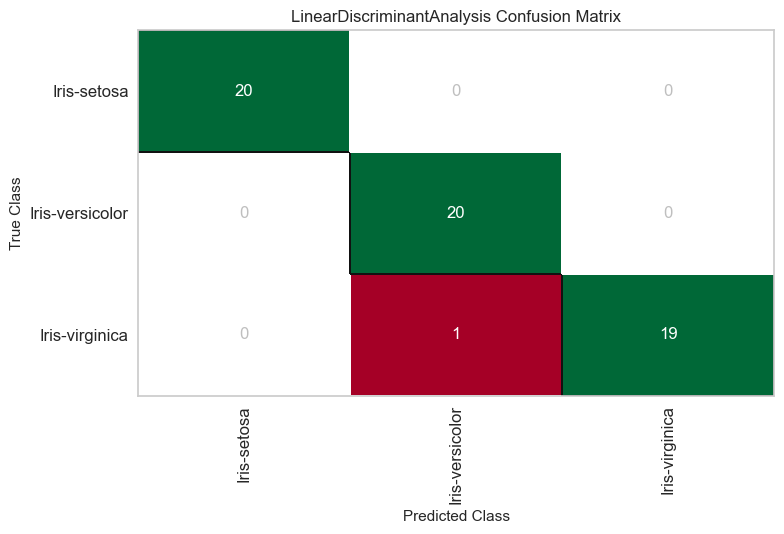

In [19]:
from yellowbrick.classifier import confusion_matrix


cm = confusion_matrix(lda,
                      X_train,
                      y_train,
                      X_test,
                      y_test,
                      is_fitted=True,
                      support=True,
                      cmap='RdYlGn')

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



<div class="alert alert-block alert-warning">
    Note that using <samp>yellowbrick</samp> the model is trained (if necessary) using <samp>sklearn</samp>, so we can skip the previous steps!
</div>
<div class="alert alert-block alert-info">
    <p>The report shows the <b>main classification metrics on a <i>per-class</i> basis. </b>This gives a <b>deeper intuition of the classifier behavior over global accuracy</b> which can mask functional weaknesses in one class of a multiclass problem.</p>
    <p>Visual classification reports are used to compare classification models to select models that have stronger classification metrics or that are more balanced.</p>
 </div>
 
 

### LDA (2 features)

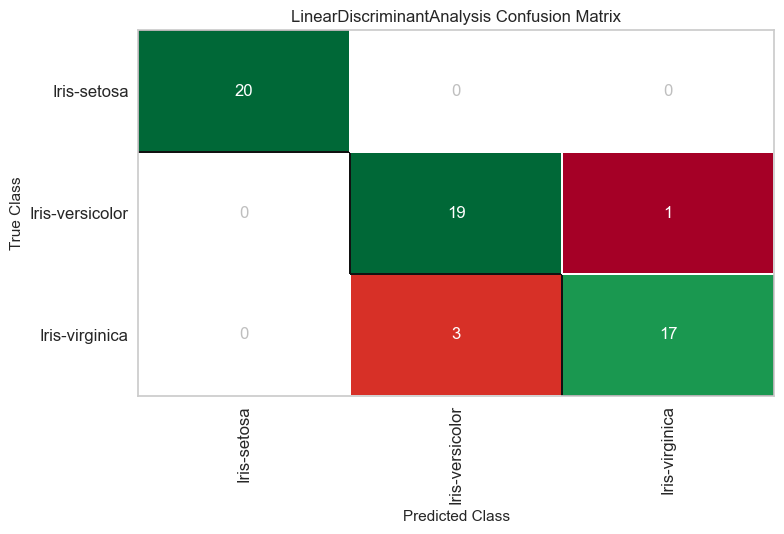

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.86      0.90        22
 Iris-virginica       0.85      0.94      0.89        18

       accuracy                           0.93        60
      macro avg       0.93      0.94      0.93        60
   weighted avg       0.94      0.93      0.93        60



In [21]:
from yellowbrick.classifier import ConfusionMatrix


# Instanciate model
lda_2 = LinearDiscriminantAnalysis()

# Train model, use it to predict
selected_predictors = ['PL', 'PW']
y_pred = lda_2.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])

cm = confusion_matrix(lda_2,
                      X_train[selected_predictors],
                      y_train,
                      X_test[selected_predictors],
                      y_test,
                      is_fitted=True,
                      support=True,
                      cmap='RdYlGn')

# Classification report
print(classification_report(y_pred, y_test))

With only 2 features, the performance degrades a bit, but it makes a better teaching example.

Let's explore the performance measures deeper:

#### ROC and precision-recall curves

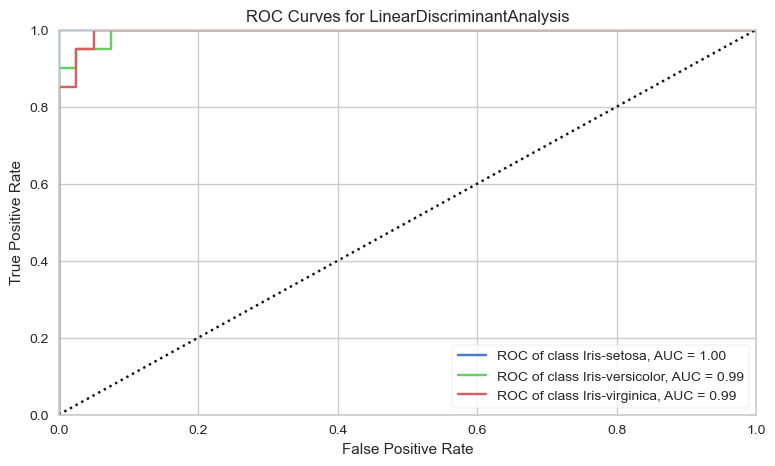

In [22]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve


# Fit visualizer to our classifier
roc_viz = ROCAUC(lda_2,
                 is_fitted=True,
                 per_class=True,
                 micro=False,
                 macro=False,
                 size=(900, 500))
roc_viz.fit(X_train[selected_predictors], y_train)
roc_viz.score(X_test[selected_predictors], y_test)
roc_viz.show();

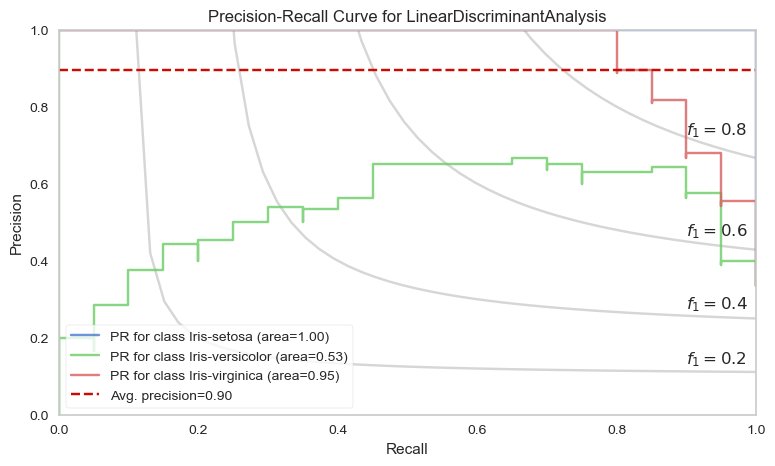

In [23]:
from sklearn.preprocessing import LabelEncoder


# Encode the target (we'll use the encoder to retrieve the class labels)
encoder = LabelEncoder()
encoded_y_train = encoder.fit_transform(y_train)

# Create the visualizer
pr_viz = PrecisionRecallCurve(lda_2,
                              classes=encoder.classes_,
                              iso_f1_curves=True,
                              per_class=True,
                              micro=False,
                              size=(900, 500))

# Fit model (we need one-versus-rest classifiers
# to produce binary comparisos for each class)
pr_viz.fit(X_train[selected_predictors], y_train)

# Calculate scores and show them
pr_viz.score(X_test[selected_predictors], y_test)
pr_viz.show();

#### Decision Boundaries

For binary problems, we can use [Yellowbrick's visualizer](https://www.scikit-yb.org/en/latest/api/contrib/boundaries.html), but there is no direct way of plotting decision boundaries for more than 2 classes.

The most common strategy is to calculate predictions for all the points of the feature space (using a grid of points) and then plot the decision regions using contour plots, for example. There is a nice `sklearn`example in the [documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html).

Of course, with LDA there's always the possibility of obtaining the decision boundaries analytically (see the formulas in the course slides), or [use the LDA coeffients as in this example](https://stackoverflow.com/questions/57770383/plot-boundary-lines-between-classes-in-python-based-on-multidimensional-data), but we will stick to the grid approach in these examples:

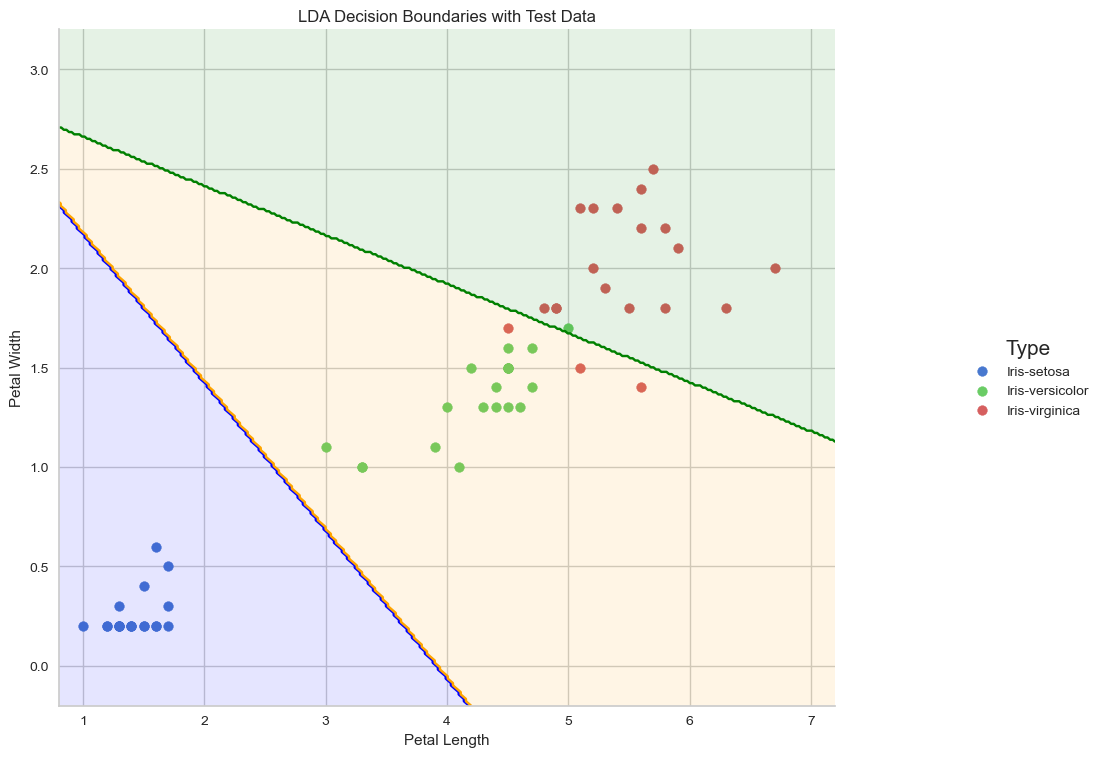

In [24]:
lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(X_train[selected_predictors].values, encoded_y_train)
y_pred = lda_2.predict(X_test[selected_predictors].values)

N = 300
X = np.linspace(np.floor(min(X_train["PL"])) - 0.2,
                np.ceil(max(X_train["PL"]))+0.2,
                N)
Y = np.linspace(np.floor(min(X_train["PW"])) - 0.2,
                np.ceil(max(X_train["PW"]))+0.2,
                N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test,
                  hue="Type",
                  height=5).map(plt.scatter,
                                "PL",
                                "PW").add_legend()
zz = np.array([lda_2.predict(np.array([[xx, yy]]))
              for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

# Plot the filled and boundary contours
g.ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'orange', 'green'))
g.ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'orange', 'green'))

# Add axis and title
g.ax.set_xlabel('Petal Length')
g.ax.set_ylabel('Petal Width')
g.ax.set_title('LDA Decision Boundaries with Test Data')
g.fig.set_figheight(8)
g.fig.set_figwidth(12)

### Gaussian Naive Bayes classifier

We know that Naive Bayes is a popular classification model. It contains the word _Naive_ because it assumes class independence, which means that given the class, each feature value is assumed to be independent of that of any other feature.

We also know that it is clearly not the case here (because of the high correlation between the petal features), but let’s examine the performance of this model to see whether this assumption is robust:

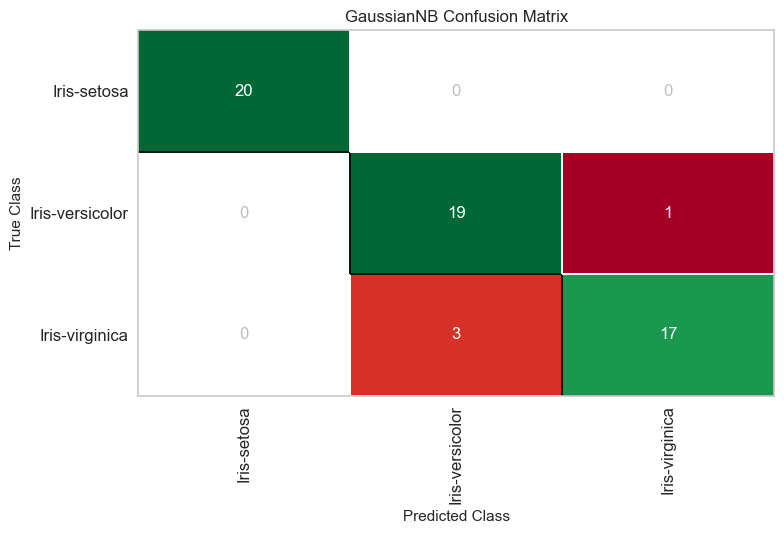

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.86      0.90        22
 Iris-virginica       0.85      0.94      0.89        18

       accuracy                           0.93        60
      macro avg       0.93      0.94      0.93        60
   weighted avg       0.94      0.93      0.93        60



In [25]:
def evaluate_classifier(model, X_train, y_train, X_test, y_test):
    # Train model, use it to predict
    y_pred = model.fit(X_train, y_train).predict(X_test)

    cm = confusion_matrix(model,
                          X_train,
                          y_train,
                          X_test,
                          y_test,
                          is_fitted=True,
                          support=True,
                          cmap='RdYlGn')

    # Classification report
    print(classification_report(y_pred, y_test))
    
    return model


# Evaluate model
evaluate_classifier(GaussianNB(), X_train, y_train, X_test, y_test);

### Logistic regression

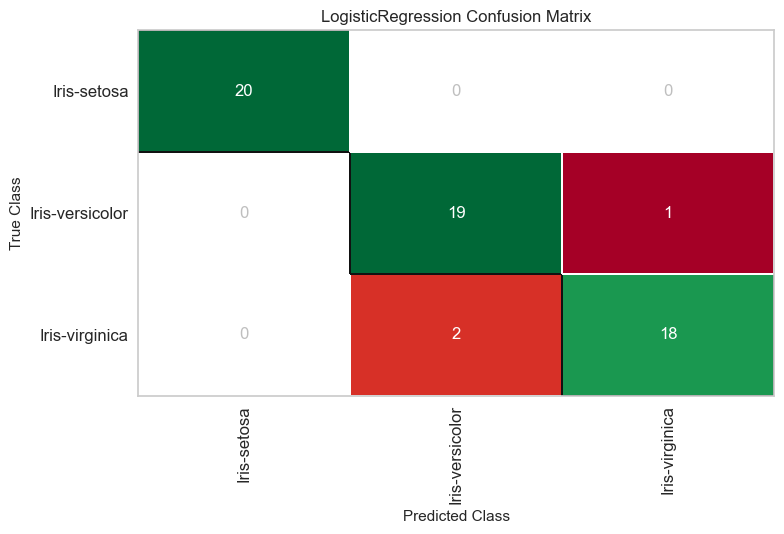

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.90      0.93        21
 Iris-virginica       0.90      0.95      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



In [26]:
evaluate_classifier(LogisticRegression(solver='newton-cg'),
                    X_train,
                    y_train,
                    X_test,
                    y_test);

### k-NN

Let's try k-NN with 10 neighbours:

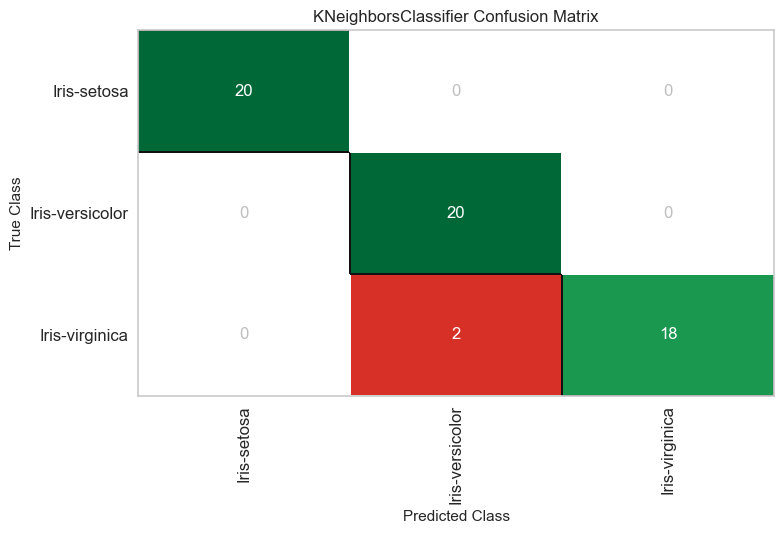

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.91      0.95        22
 Iris-virginica       0.90      1.00      0.95        18

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



In [27]:
evaluate_classifier(KNeighborsClassifier(n_neighbors=10),
                    X_train,
                    y_train,
                    X_test,
                    y_test);

### Decision Tree

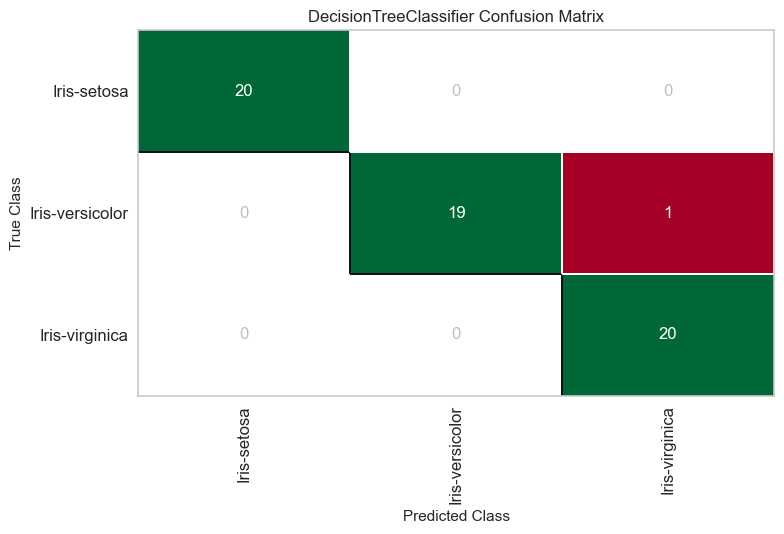

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.95      0.98        21

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [28]:
# Confusion matrix
dt = evaluate_classifier(DecisionTreeClassifier(max_depth=3, random_state=42),
                    X_train,
                    y_train,
                    X_test,
                    y_test);

#### Feature importance
Let's check the _feature importance_ calculated by the tree:

In [29]:
pd.DataFrame(zip(X_train.columns, dt.feature_importances_*100),
             columns=["Feature", "% importance"]).sort_values("% importance", ascending=False)

Feature  % importance
2      PL     94.756448
3      PW      5.243552
0      SL      0.000000
1      SW      0.000000

The `yellowbrick` module can create feature importance visualizers as well:

C:\Users\Jan\anaconda3\envs\data_analysis\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


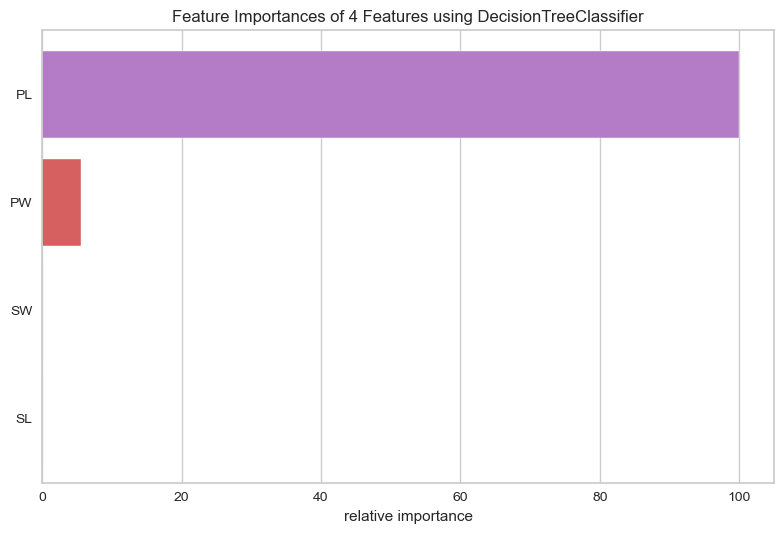

In [30]:
from yellowbrick.model_selection import FeatureImportances

fi_viz = FeatureImportances(dt)
fi_viz.fit(X_train, y_train)
fi_viz.show();

Finally, we plot the tree to understand a bit how splitting is made and how impurity varies at each split:

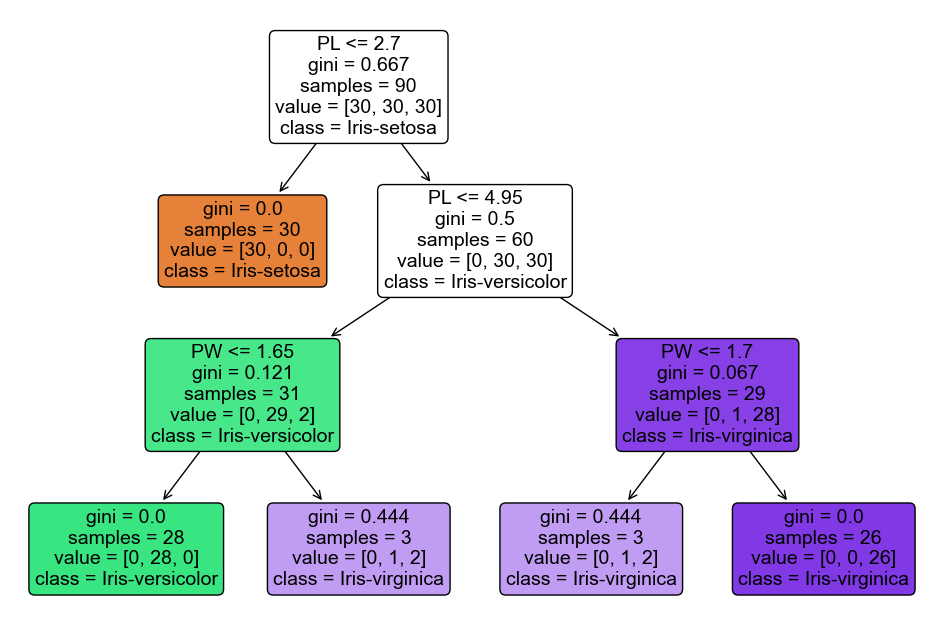

In [31]:
with plt.style.context('default'):  # a silly bug makes us do this to see the tree
    plt.figure(figsize=(12, 8))
    plot_tree(dt,
              impurity=True,
              feature_names=X_train.columns,
              class_names=encoder.classes_,
              fontsize=14,
              rounded=True,
              filled=True)

Apart from each rule (for example, if $PL \leq 2.7$ we decide Iris Setosa, if not then we continue splitting the tree). We can see the impurity measure (`gini` index), assigned class, etc. at each split.

Note that the two leaves at the right and left extremes are pure, but the two light purple ones are not. This means that we must be _less confident_ regarding the instances in these two light purple "boxes".

If we use only two features, we can also obtain boundary plots for for this tree.

#### Decision boundaries

C:\Users\Jan\AppData\Local\Temp\ipykernel_6220\79877480.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color,


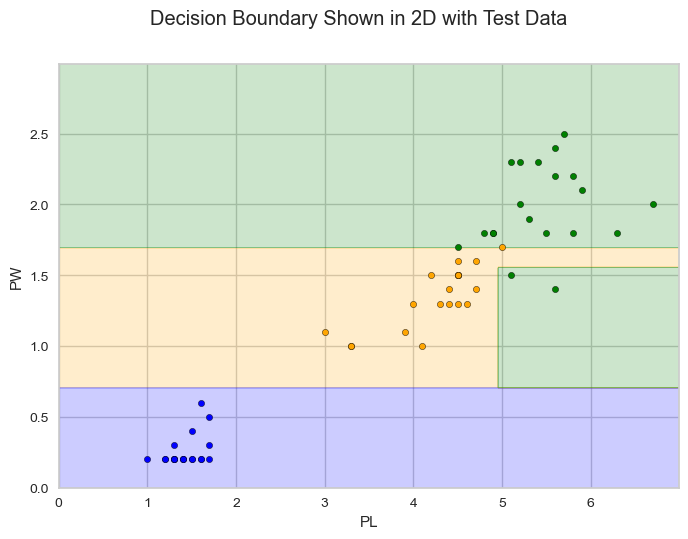

In [32]:
from matplotlib.colors import ListedColormap
plot_colors = ('blue', 'orange', 'green')
cmap = ListedColormap(plot_colors)

# plot decision boundary for pedal width vs pedal length
plot_step = 0.01

xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

dt_2 = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_2.fit(X_train[selected_predictors].values, encoded_y_train)

pred_all = dt_2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=cmap, alpha=0.2)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(encoder.classes_, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color,
                label=y_test, cmap="spectral", edgecolor='black', s=20)
plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

### Support vector classifier

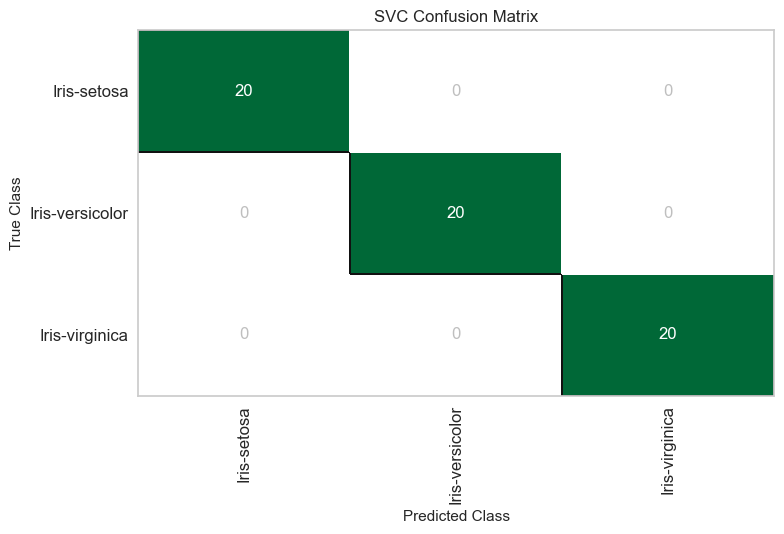

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



In [33]:
# Confusion matrix
evaluate_classifier(SVC(kernel='linear'),
                    X_train,
                    y_train,
                    X_test,
                    y_test);

It turns out that the SVM classifier shows perfect scores in this case!

That would be all for the examples on the Iris Dataset. Now go to the exercises below!

<br>
<br>
<div class="alert alert-block alert-success", style="border-radius: 70px">
    <h1 style="text-align: center; margin-left:4cm; margin-top:0.5cm; margin-bottom:0.5cm; font-size:48px">Exercises</h1>
</div>
<br>
<div>
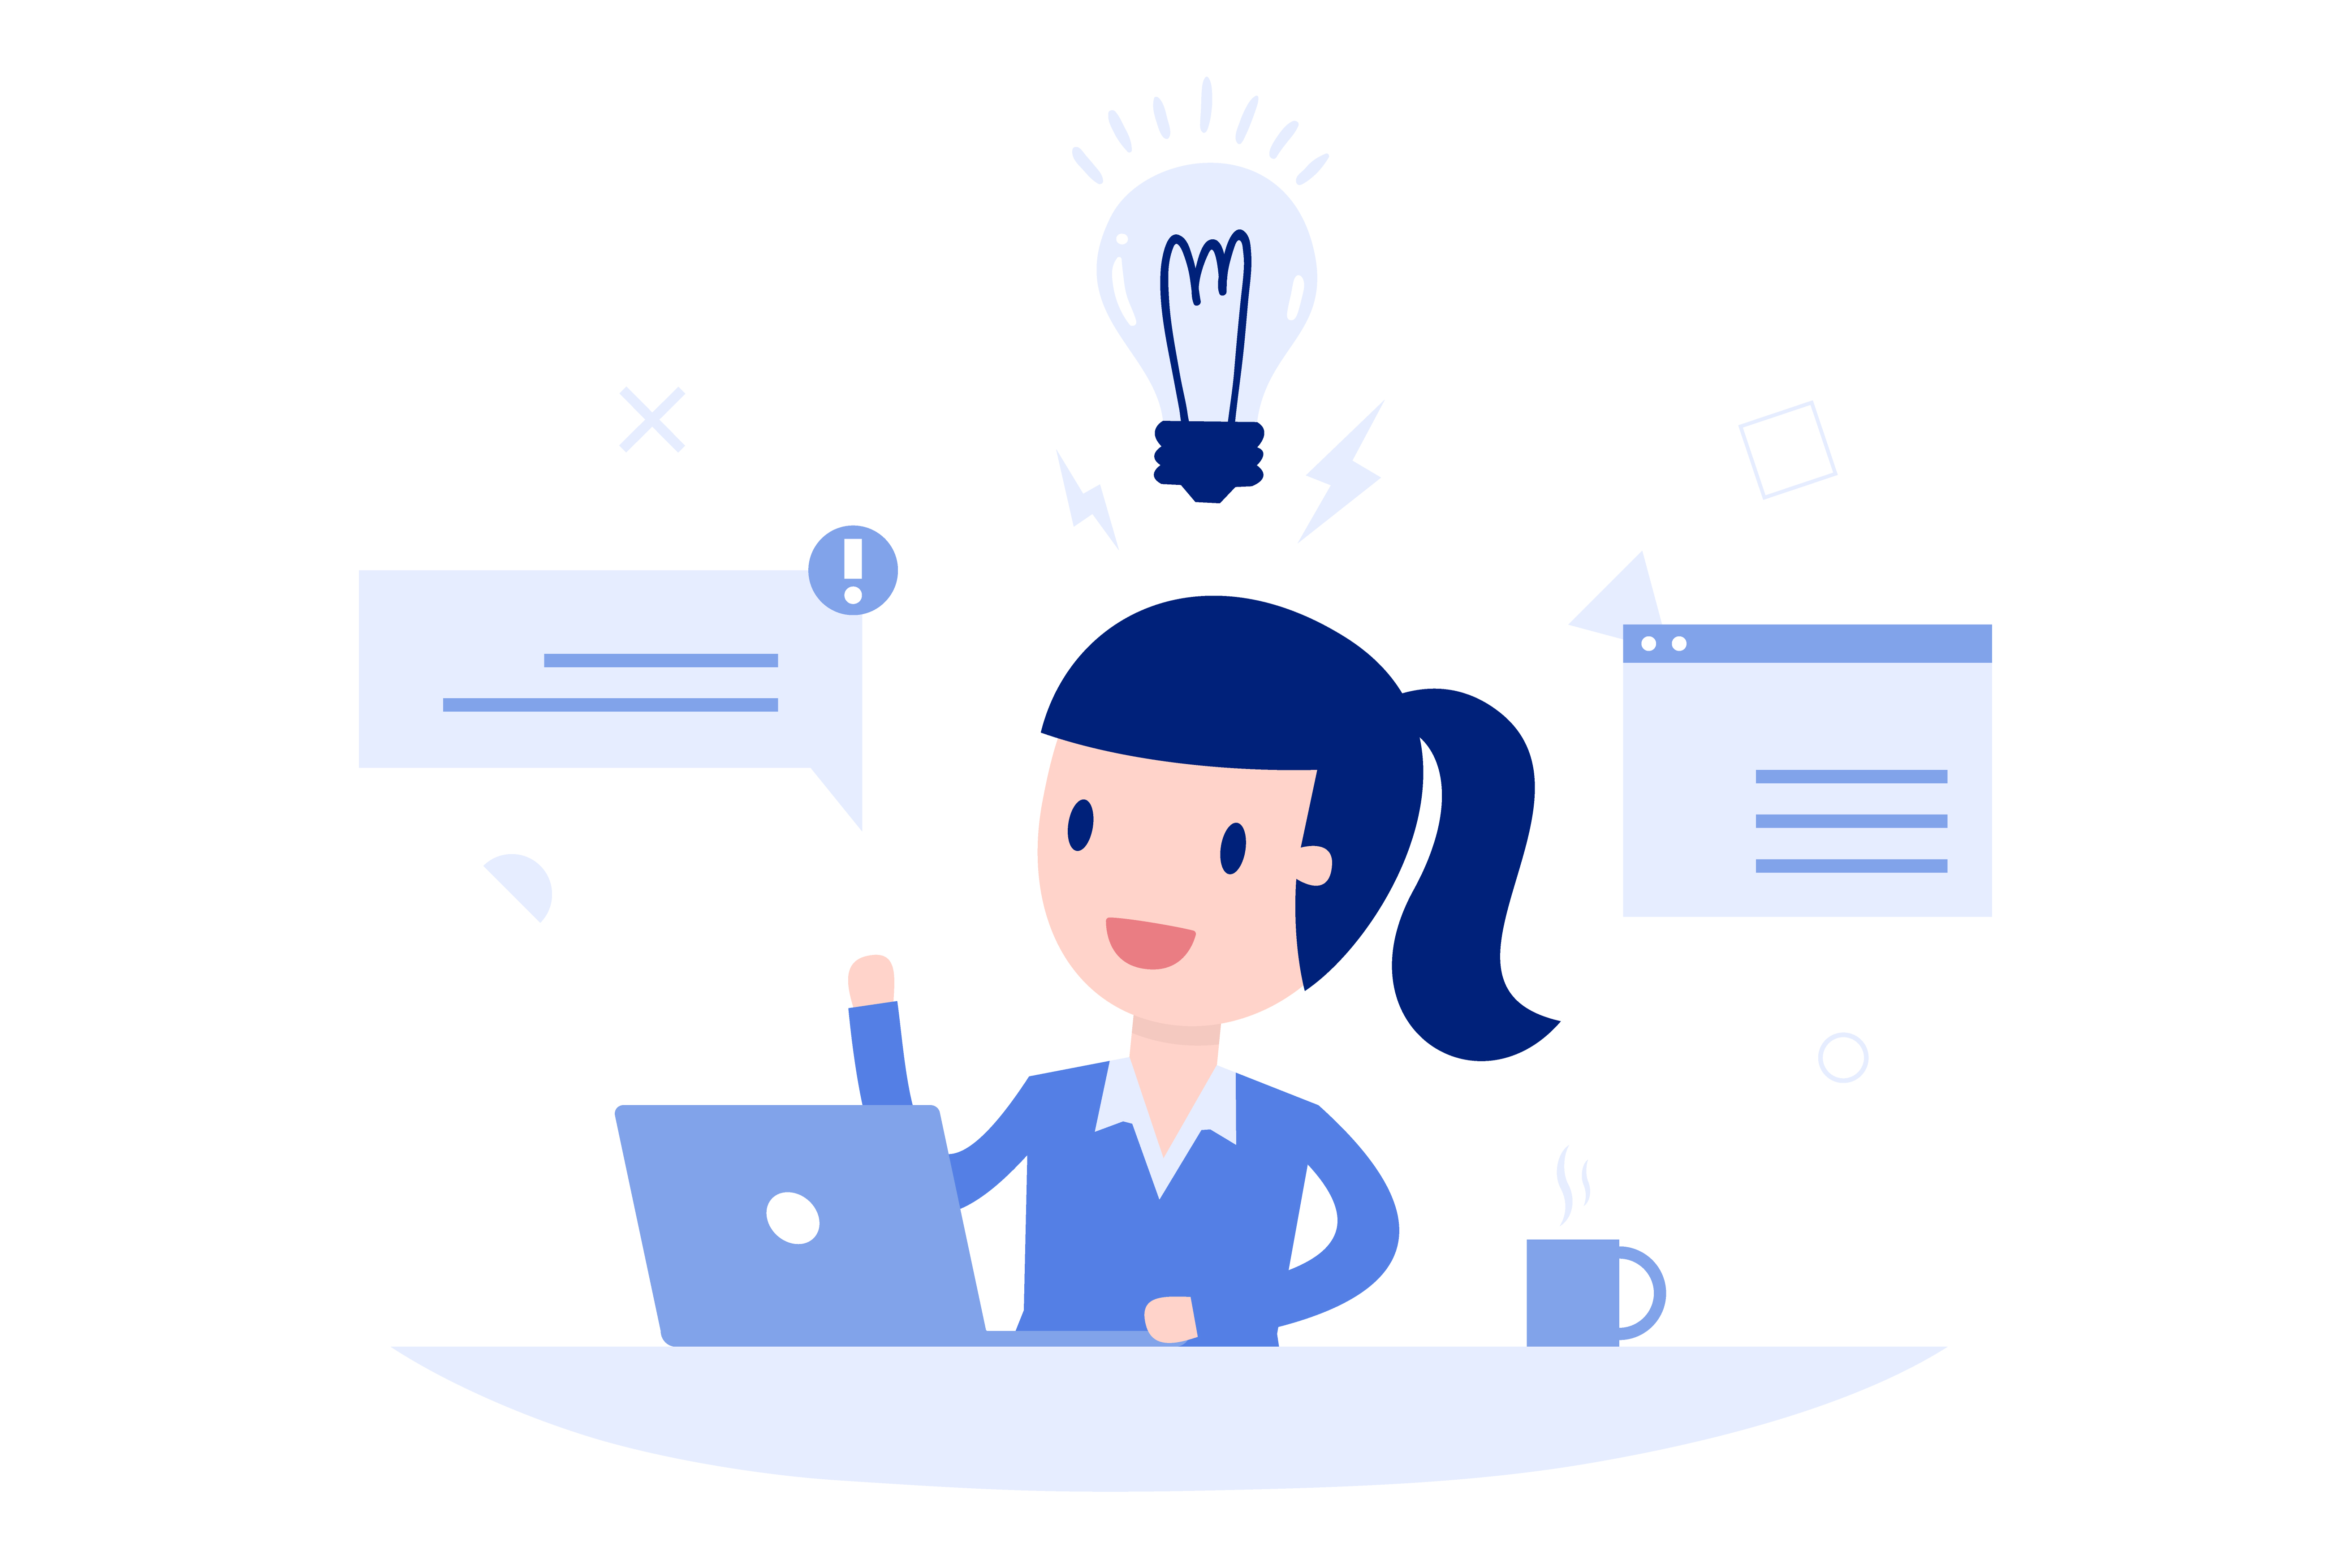
</div>

<h2 style="margin-top:0.5cm; margin-bottom:0.5cm; color: green">Exercise 1. Boundaries, boundaries</h2>
    
Do the boundary plot of different classifiers (LR and SVC, for example) on the Iris Dataset. Use the previous examples as a guide, or check the examples in the [sklearn documentation](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html#) (just try to understant the code a bit, not only copy it!).

Remember that 2D plots will not allow us to see the "perfect" decision boundary of the SVM trained above, but the algorithm achieves the results in 4D.

<div class="alert alert-block alert-info">
    Use as many additional markdown and code cells as you need to obtain and comment your results.
</div>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

In [35]:
X_t = X_train[selected_predictors].values

#### Logistic Regression

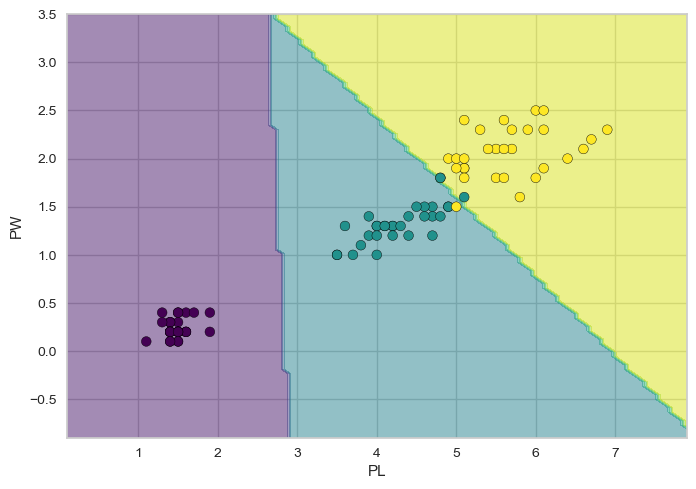

In [36]:
lr = LogisticRegression().fit(X_t, encoded_y_train)
disp = DecisionBoundaryDisplay.from_estimator(
     lr, X_t, response_method="predict",
     xlabel="PL", ylabel="PW",
     alpha=0.5, cmap='viridis',
)
scatter = disp.ax_.scatter(X_t[:, 0], X_t[:, 1], c=encoded_y_train, cmap='viridis', edgecolor="black")

plt.show()

Using a Logistic Regression boundary, a good classification is achieved.

#### SVM

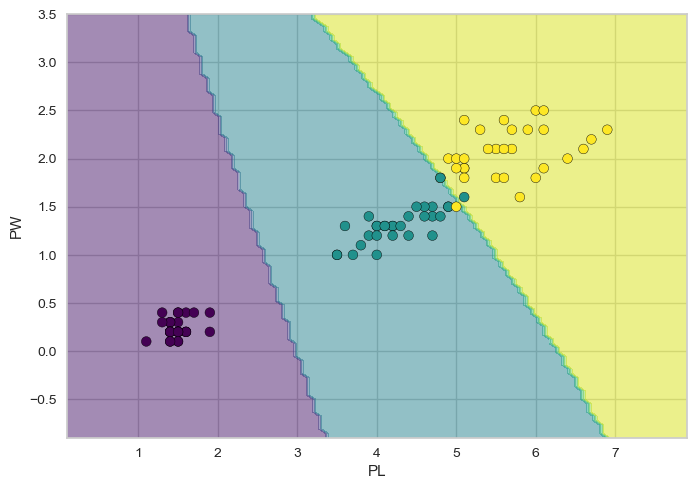

In [37]:
svm_ = svm.SVC().fit(X_t, encoded_y_train)
disp2 = DecisionBoundaryDisplay.from_estimator(
     svm_, X_t, response_method="predict",
     xlabel="PL", ylabel="PW",
     alpha=0.5, cmap='viridis',
)
scatter = disp2.ax_.scatter(X_t[:, 0], X_t[:, 1], c=encoded_y_train, cmap='viridis', edgecolor="black")

plt.show()

Using a SVM boundary, a good classification is achieved. Comparing it with the previously showed method, and taking into account that it was linear. We have the hypothesis that the SVM boundary (due to its non-linearity), will be able to classify better with new data. 

#### Linear SVM

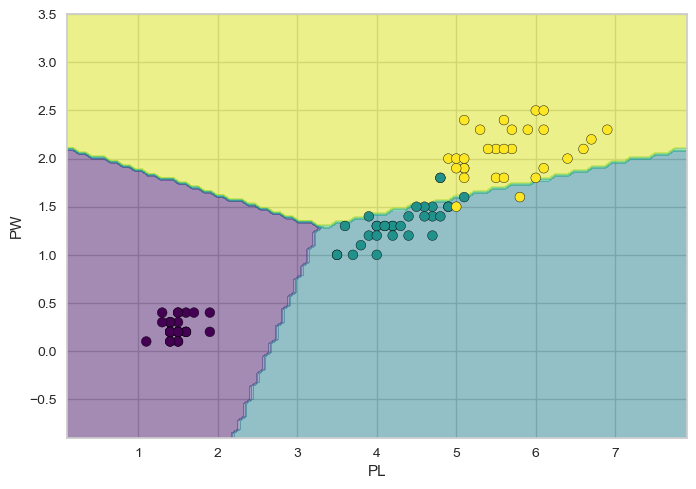

In [38]:
svm_linear = svm.LinearSVC().fit(X_t, encoded_y_train)
disp3 = DecisionBoundaryDisplay.from_estimator(
     svm_linear, X_t, response_method="predict",
     xlabel="PL", ylabel="PW",
     alpha=0.5, cmap='viridis',
)
scatter = disp3.ax_.scatter(X_t[:, 0], X_t[:, 1], c=encoded_y_train, cmap='viridis', edgecolor="black")

plt.show()

When using a linear SVM boundary, our previous hypothesis can be confirmed, since more data is classified incorrectly.

<hr style="margin-top:0.5cm; margin-bottom:0.5cm; border-top: 9px double #BBDDBB; background-color: #FFF"></hr><br>
<h2 style="margin-top:0.5cm; margin-bottom:0.5cm; color: green">Exercise 2. EDA in a real dataset</h2>

Load the dataset in the file `240317-05-stroke.xlsx` and perform the exploratory data analysis.

<div class="alert alert-block alert-info">
Note that this is an Excel file that can be loaded into a <samp>pandas</samp> dataframe using <samp>pandas.read_excel</samp> and the <samp>openpyxl</samp> engine (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html">see the official docs for details</a>).
</div>

<div class="alert alert-block alert-warning">
The dataset contains several missing values, as it is almost impossible to collect all data from all participants in real studies. You can choose to delete the corresponding row or impute data using the mean, the median, or use an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html">imputer based on k-NN</a>.
</div>

<div class="alert alert-block alert-danger">
<p>Before any EDA or other processing, remember to divide the dataset into 2 subsets: training and test. </p><p><b>Use only the former to train!</b> The test dataset is only for reporting performance.</p></div>
</div>

This dataset contains information on patients who have suffered an ischemic stroke and have performed cognitive rehabilitation using at the Institut Guttmann using their [GNPT platform](https://gnpt.es/).

Description of the features:
- **ID**: patient ID
- **NTASKS**:	number of cognitive rehab tasks performed in the GNPT platform
- **LOS**: lenght of stay (days in hospital)
- **D2H**: days from stroke to hospital admission
- **AGE1**: age when stroke
- **AGE2**: age when congnitive assessment was performed
- **GENDER**: female / male
- **MSTAT**: marital status (SG: single, MR: married, DI: divorced, WI: widower)
- **PO**: personal orientation score
- **SPO**: spatial orientation score
- **TPO**: temporal orientation score
- **LREP**: language repetition score
- **LDEN**: language denomination score
- **LUND**: language understanding score
- **DIGMEM**: digit memory at the time of admission
- **RAVLT0751**: Ray Auditory Verbal Memory Test (RAVLT) learning memory at the time of admission
- **RAVLT0151**: RAVLT free-recall learning at the time of admission
- **MRAVLT015R1**: RAVLT recognition memory at the time of admission
- **RAVLT0752**: RAVLT learning memory at discharge
- **RAVLT0152**: RAVLT free-recall learning at discharge
- **MRAVLT015R2**: RAVLT recognition memory at discharge
- **FEPMR2**: Verbal fluency test (PMR) at discharge
- **IMP_RAVLT075**: Improvement in RAVLT075 after rehabilitation
- **IMP_GT5**: Improvement in RAVLT075 greater than 5 points (yes/no)

Some of these data have already been used [in published studies](https://doi.org/10.1080/10749357.2020.1765660). The digits score and the language and orientation assessments are described in this [article](https://doi.org/10.1016/S0214-4603(91)75507-1).

In the next exercise we will try to predict **IMP_GT5** using some of the features, so try out any of the tools we have already seen!

<div class="alert alert-block alert-info">
    Use as many additional markdown and code cells as you need to obtain and comment your results.
</div>

### Load data

In [39]:
# Load the dataset (dropping missing data)
data_stroke = pd.read_excel(
    DATA_PATH / "240317-05-stroke.xlsx",
    engine="openpyxl")

# Create a dummy column based on IMP_GT5
data_stroke['dummy_column'] = np.where(data_stroke['IMP_GT5'] == 'YES', 1, 0)

In [40]:
# Encode categorical variables
data_stroke.rename(columns = {'SEX':'FEMALE'}, inplace = True)
data_stroke['FEMALE'] = np.where(data_stroke['FEMALE']=='FEMALE', True, False)
data_stroke['IMP_GT5'] = np.where(data_stroke['IMP_GT5']=='YES', True, False)

# Drop marital status and id
data_stroke.drop(columns=['MSTAT', 'ID'], inplace = True)
data_stroke

NTASKS         LOS        D2H       AGE1       AGE2  FEMALE   PO  SPO  \
0       248  132.131829  30.533576  43.117808  43.201462   False  7.0  5.0   
1       181   73.966840  19.768275  55.534247  55.588406    True  7.0  5.0   
2        49   36.917766  18.744595  55.446575  55.497930   False  7.0  5.0   
3        57   35.243981  56.540139  49.728767  49.883672    True  7.0  5.0   
4        75   68.989340  39.662928  34.819178  34.927844    True  7.0  5.0   
..      ...         ...        ...        ...        ...     ...  ...  ...   
292      39   41.038252  50.514201  47.660274  47.798669   False  7.0  5.0   
293     240  112.234178  33.422245  42.605479  42.697047    True  7.0  5.0   
294     167  117.959062  47.659144  44.000000  44.130573   False  7.0  5.0   
295      65   77.162488  32.540139  47.506849  47.596000   False  7.0  3.0   
296     209  156.843495  51.774433  40.336986  40.478834   False  7.0  5.0   

      TPO  LREP  ...  RAVLT0751  RAVLT0151  RAVLT015R1  RAVLT0752  RAVLT0152  \
0    23.0  10.0  ...       49.0       11.0        14.0        9.0       11.0   
1    23.0  10.0  ...       37.0        7.0        15.0        NaN        NaN   
2    23.0  10.0  ...       31.0        1.0         0.0        NaN        NaN   
3    23.0  10.0  ...       51.0       14.0        14.0       35.0       10.0   
4    22.0  10.0  ...       56.0       13.0        15.0       42.0        8.0   
..    ...   ...  ...        ...        ...         ...        ...        ...   
292  23.0   NaN  ...        NaN        NaN         NaN       33.0        8.0   
293  23.0   NaN  ...        NaN        NaN         NaN       39.0        6.0   
294  23.0  10.0  ...        NaN        NaN         NaN       44.0        7.0   
295  21.0  10.0  ...        NaN        NaN         NaN       49.0        9.0   
296  23.0   NaN  ...        NaN        NaN         NaN       63.0       15.0   

     RAVLT015R2  FEPMR2  IMP_RAVLT075  IMP_GT5  dummy_column  
0          14.0    40.0           -40    False             0  
1           NaN     NaN           -37    False             0  
2           NaN     NaN           -31    False             0  
3          13.0    29.0           -16    False             0  
4          13.0    48.0           -14    False             0  
..          ...     ...           ...      ...           ...  
292        15.0     NaN            33     True             1  
293        12.0    15.0            39     True             1  
294        10.0    35.0            44     True             1  
295         9.0    33.0            49     True             1  
296        15.0    30.0            63     True             1  

[297 rows x 23 columns]

#### DATA ANALYSIS

In [41]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NTASKS        297 non-null    int64  
 1   LOS           297 non-null    float64
 2   D2H           297 non-null    float64
 3   AGE1          297 non-null    float64
 4   AGE2          297 non-null    float64
 5   FEMALE        297 non-null    bool   
 6   PO            291 non-null    float64
 7   SPO           291 non-null    float64
 8   TPO           291 non-null    float64
 9   LREP          284 non-null    float64
 10  LDEN          285 non-null    float64
 11  LUND          284 non-null    float64
 12  DIGMEM        285 non-null    float64
 13  RAVLT0751     274 non-null    float64
 14  RAVLT0151     270 non-null    float64
 15  RAVLT015R1    269 non-null    float64
 16  RAVLT0752     281 non-null    float64
 17  RAVLT0152     280 non-null    float64
 18  RAVLT015R2    280 non-null    

Analysing the information of our dataset, we observe that it is formed by 297 entries and 23 columns.

***Irrelevant data***

We analyze the distribution of the data in order to see if there's some atribute that clearly doesn't provides us any valuable information.

In [42]:
# Variables of interest
variables = ['NTASKS', 'LOS', 'D2H', 'AGE1', 'AGE2', 'FEMALE', 'PO', 
             'SPO', 'TPO', 'LREP', 'LDEN', 'LUND', 'DIGMEM', 'RAVLT0751', 'RAVLT0151', 
             'RAVLT0752', 'RAVLT0152', 'FEPMR2', 'IMP_RAVLT075', 'IMP_GT5']

# Compute value counts for each variable
for var in variables:
    print(f"Value counts for {var}:")
    print(data_stroke[var].value_counts())
    print()

Value counts for NTASKS:
NTASKS
46     4
14     4
68     4
122    4
62     3
      ..
134    1
93     1
384    1
253    1
167    1
Name: count, Length: 201, dtype: int64

Value counts for LOS:
LOS
132.131829    1
76.998530     1
179.063137    1
99.941528     1
118.737894    1
             ..
125.871667    1
110.130532    1
47.284896     1
58.862025     1
156.843495    1
Name: count, Length: 297, dtype: int64

Value counts for D2H:
D2H
30.533576    1
17.524792    1
70.552269    1
57.777940    1
47.741678    1
            ..
73.657106    1
58.479028    1
54.481273    1
39.761840    1
51.774433    1
Name: count, Length: 297, dtype: int64

Value counts for AGE1:
AGE1
55.731507    2
50.835616    2
40.167123    2
43.117808    1
54.673973    1
            ..
32.301370    1
41.463014    1
59.780822    1
48.438356    1
40.336986    1
Name: count, Length: 294, dtype: int64

Value counts for AGE2:
AGE2
43.201462    1
45.404178    1
56.804253    1
34.095282    1
47.002032    1
            ..
49.51

A positive fact that can be seen is that target values (IMP_GT5) are highly balanced, so, there are approximately the same number of true values than false ones.

***Null values analysis***

In [43]:
data_stroke.isnull().sum()

NTASKS           0
LOS              0
D2H              0
AGE1             0
AGE2             0
FEMALE           0
PO               6
SPO              6
TPO              6
LREP            13
LDEN            12
LUND            13
DIGMEM          12
RAVLT0751       23
RAVLT0151       27
RAVLT015R1      28
RAVLT0752       16
RAVLT0152       17
RAVLT015R2      17
FEPMR2          24
IMP_RAVLT075     0
IMP_GT5          0
dummy_column     0
dtype: int64

As it is seen in the previous print, there are some columns with null values that need to be treated.

A variable will be dropped if the number of null values is significant. Taken into account that each column contains 297 entries, none of them has enough null values in order to remove it. 

However, the fact that the null values are represented with a NaN poses an issue, since no information regarding the data type is known. To solve this issue, we need to know if null values correpond to a categorical or numerical variable.

In [44]:
data_stroke['PO'].unique()

array([ 7., nan,  5.,  6.])

In [45]:
data_stroke['SPO'].unique()

array([ 5.,  4., nan,  3.,  2.])

In [46]:
data_stroke['TPO'].unique()

array([23., 22., 21., 17., nan, 12.,  5., 15., 20., 16., 18., 10.])

In [47]:
data_stroke['LREP'].unique()

array([10.,  9., nan,  7.,  8.])

In [48]:
data_stroke['LDEN'].unique()

array([14., 13., 11.,  9., 12., nan, 10.,  8.,  7.])

In [49]:
data_stroke['LUND'].unique()

array([15., 16., 11., 14., nan,  8., 13., 12.,  9.,  1.])

In [50]:
data_stroke['DIGMEM'].unique()

array([ 5.,  4.,  3.,  2.,  6.,  7., nan])

In [51]:
data_stroke['RAVLT0751'].unique()

array([49., 37., 31., 51., 56., 35., 46., 45., 29., 38., 48., 33., 58.,
       41., 52., 54., 53., 30., 28., 47., 26., 43., 32., 36., 34., 50.,
       nan, 20., 40., 70., 19., 57., 24., 59., 61., 22., 55., 14., 25.,
       44., 27., 21., 23., 39., 16., 42., 18., 64., 11.])

In [52]:
data_stroke['RAVLT0151'].unique()

array([11.,  7.,  1., 14., 13.,  0.,  5.,  2.,  6.,  9.,  8., 12., 10.,
        4.,  3., nan, 15.])

In [53]:
data_stroke['RAVLT015R1'].unique()

array([14., 15.,  0., 10.,  7., 11., 12., 13.,  1.,  9.,  4.,  6.,  8.,
       nan,  3.,  5.,  2.])

In [54]:
data_stroke['RAVLT0752'].unique()

array([ 9., nan, 35., 42., 23., 36., 37., 22., 31., 41., 26., 40., 46.,
       53., 52., 48., 50., 49., 29., 25., 44., 34., 38., 28., 27., 30.,
       32., 33., 55., 20., 56., 70., 54., 47., 19., 57., 24., 59., 61.,
       43., 15., 39., 60., 66., 69., 51., 45., 67., 64., 58., 63., 21.,
       65.])

In [55]:
data_stroke['RAVLT0152'].unique()

array([11., nan, 10.,  8.,  5.,  3.,  6., 12.,  7.,  4.,  2., 13.,  0.,
        9., 14., 15.,  1.])

In [56]:
data_stroke['RAVLT015R2'].unique()

array([14., nan, 13.,  7.,  0., 11., 10.,  4., 12., 15.,  3.,  8.,  9.,
        6.,  5.,  1.,  2.])

In [57]:
data_stroke['FEPMR2'].unique()

array([40., nan, 29., 48., 28., 36., 46., 23., 35., 45., 38., 32., 44.,
       26., 50., 52., 49., 10., 37., 24., 30., 34., 20., 27., 25., 15.,
       22., 31., 57., 55., 21.,  7., 84., 58., 33., 41., 16., 19., 13.,
       17., 12.,  9., 47., 11., 53., 14.,  3., 60., 39., 70., 65.,  6.,
       18., 42.,  8., 56., 51., 54., 74., 59., 62., 43.,  1.])

All variables contain numerical values. Thus, the three options, which are imputing data using the mean, the median, or using an imputer based on k-NN, can be implemented. We have decided to fill the null values using the KNNImputer class from sklearn because it offers a more sophisticated approach to imputation, leveraging the local relationships between data points to provide more accurate estimates and preserve the underlying structure of the dataset. This method allows us to handle missing data in a robust and flexible manner, improving the quality and reliability of our analysis or modeling process.

In [58]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [59]:
imputer = KNNImputer(n_neighbors=3)
data_stroke_filled = imputer.fit_transform(data_stroke)

In [60]:
df_data_stroke_filled = pd.DataFrame(data_stroke_filled, columns = data_stroke.columns)
df_data_stroke_filled.head()

NTASKS         LOS        D2H       AGE1       AGE2  FEMALE   PO  SPO  \
0   248.0  132.131829  30.533576  43.117808  43.201462     0.0  7.0  5.0   
1   181.0   73.966840  19.768275  55.534247  55.588406     1.0  7.0  5.0   
2    49.0   36.917766  18.744595  55.446575  55.497930     0.0  7.0  5.0   
3    57.0   35.243981  56.540139  49.728767  49.883672     1.0  7.0  5.0   
4    75.0   68.989340  39.662928  34.819178  34.927844     1.0  7.0  5.0   

    TPO  LREP  ...  RAVLT0751  RAVLT0151  RAVLT015R1  RAVLT0752  RAVLT0152  \
0  23.0  10.0  ...       49.0       11.0        14.0   9.000000  11.000000   
1  23.0  10.0  ...       37.0        7.0        15.0  45.666667   9.666667   
2  23.0  10.0  ...       31.0        1.0         0.0  32.333333   7.000000   
3  23.0  10.0  ...       51.0       14.0        14.0  35.000000  10.000000   
4  22.0  10.0  ...       56.0       13.0        15.0  42.000000   8.000000   

   RAVLT015R2     FEPMR2  IMP_RAVLT075  IMP_GT5  dummy_column  
0   14.000000  40.000000         -40.0      0.0           0.0  
1   10.333333  45.333333         -37.0      0.0           0.0  
2   11.333333  22.333333         -31.0      0.0           0.0  
3   13.000000  29.000000         -16.0      0.0           0.0  
4   13.000000  48.000000         -14.0      0.0           0.0  

[5 rows x 23 columns]

In order to be sure that there's no nan value left, we execute the following line of code:

In [61]:
df_data_stroke_filled.isnull().sum()


NTASKS          0
LOS             0
D2H             0
AGE1            0
AGE2            0
FEMALE          0
PO              0
SPO             0
TPO             0
LREP            0
LDEN            0
LUND            0
DIGMEM          0
RAVLT0751       0
RAVLT0151       0
RAVLT015R1      0
RAVLT0752       0
RAVLT0152       0
RAVLT015R2      0
FEPMR2          0
IMP_RAVLT075    0
IMP_GT5         0
dummy_column    0
dtype: int64

#### TRAIN AND TEST

Once there is no null value left in the dataframe, we can split the data into train and test sets.

In order to split the data, first of all, we have to decide which variable is going to be the target, so, which variable we want to predict. As the statement requires, out target variable is `IMP_GT5`.

In [86]:
# target
y = df_data_stroke_filled['IMP_GT5']

# data
X = df_data_stroke_filled[['NTASKS', 'LOS', 'D2H', 'AGE1', 'AGE2', 'FEMALE', 'PO', 
             'SPO', 'TPO', 'LREP', 'LDEN', 'LUND', 'DIGMEM', 'RAVLT0751', 'RAVLT0151', 
             'RAVLT0752', 'RAVLT0152', 'FEPMR2', 'IMP_RAVLT075']]

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<hr style="margin-top:0.5cm; margin-bottom:0.5cm; border-top: 9px double #BBDDBB; background-color: #FFF"></hr><br>
<h2 style="margin-top:0.5cm; margin-bottom:0.5cm; color: green">Exercise 3. Classification!</h2>

Using the training and test datasets from the previous exercise, fit one (or more) binary classifier and evaluate its performance in terms of accuracy, precision, recall, area under the ROC etc.

Before fittin a model, it is also interesting to plot some validation and learning curves to study it. Although we have not used them previously, we know about them because we discussed them in class. Some useful examples can be found in the **Yellowbrick documentation** ([validation curves](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html), [learning curves](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html)).

Try to answer the following questions, justifying your answers:
- Can the decision boundary be linear?
- Which is the best classifier that you have tried? Why?
- Do we have sufficient data to ensure the best possible model in each case?

<div class="alert alert-block alert-info">
    Use as many additional markdown and code cells as you need to obtain and comment your results.
</div>

In [89]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from yellowbrick.classifier import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [90]:
def study_model(model, X, y, param_name,param_range):
    
    sizes = np.linspace(0.1, 1.0, 10)    
        
    # Validation curve

    vc = ValidationCurve(
        model, param_name=param_name,
        param_range=param_range, cv=10, scoring="r2"
    )
       
        
    vc.fit(X, y)
    vc.show()

    # Learning Curve
    lc = LearningCurve(
        model, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
    )

    lc.fit(X, y)
    lc.show()           

    return model

In [91]:
def binary_classification(model, X_train, y_train, X_test, y_test):
    # Train model, use it to predict
    y_pred = model.fit(X_train, y_train).predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    
    # Calculate evaluation metrics
    cm = confusion_matrix(model,
                      X_train,
                      y_train,
                      X_test,
                      y_test,
                      is_fitted=True,
                      support=True,
                      cmap='RdYlGn')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Display results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Roc AUC score:", roc_auc)
    
    # Roc curve
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
        
    # Classification report
    print(classification_report(y_pred, y_test))
    
    return model

A validation curve is a tool that is useful to visualize the performance of the model under study. It represents the training and validation scores as a function of a selected hyperparameter, in order to analyse how sensitive the model is to that parameter. 

For each of the algorithms, a specific hyperparameter was chosen. The validation curve obtained for the LDA took into account the effect of the shrinkage, which controls the amount of regularization applied to the estimated covariance matrices, which may help in turn to prevent overfitting by reducing the variance of parameter estimates. 

Regarding the learning curve, it shows the relationship of the training score with respect to the cross-validated test score, and helps estimate the amount of needed data and to assess if the model is more sensitive to error due to variance or due to bias. If the training and cross-validation scores converge together with more data the model has probably enough data. In contrast, if the training score is higher than the validation score, then the model probably needs more data. 

If the model suffers from bias, then there will be more variability around the training score curve, while if the model suffers from variance, then there will be more variability around the cross validated score.

### **LDA**

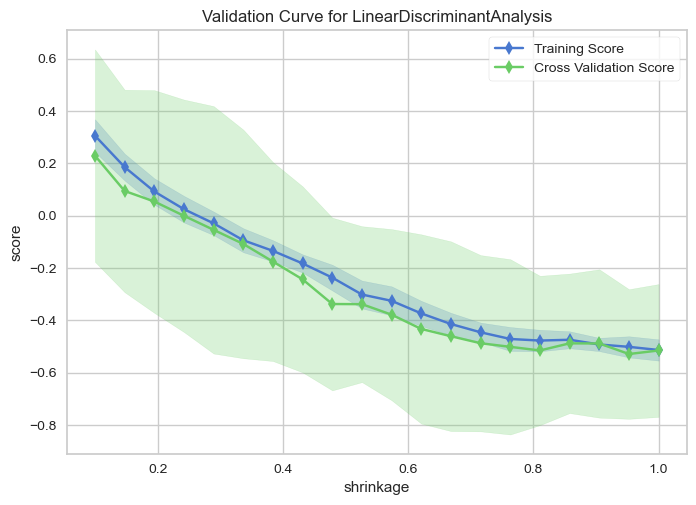

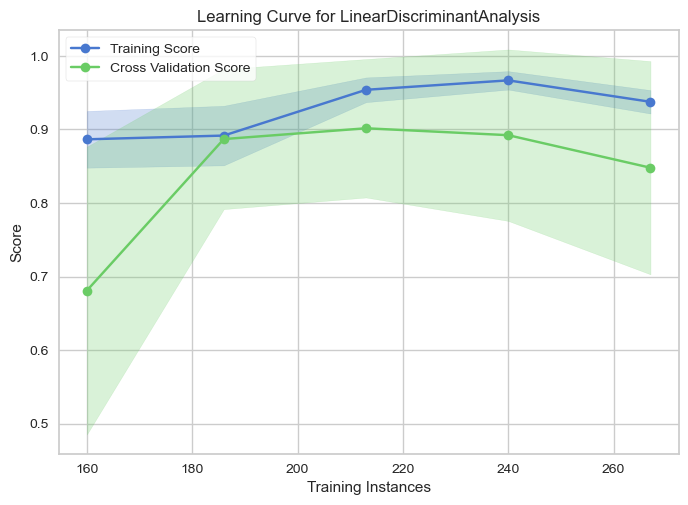

LinearDiscriminantAnalysis(solver='lsqr')

In [80]:
lda = LinearDiscriminantAnalysis(solver='lsqr')

study_model(lda, X, y,'shrinkage',np.linspace(0.1, 1, 20))


As it can be seen in the obtained plot, the maximum score is on the lowest value of shrinkage, and the performance decreases as shrinkage increases. Moreover, both the training and the cross-validation score curves are very similar, and the decrease in performance may suggest that higher shrinkage values lead to underfitting of the data, since the model becomes too simple. 

In addition, the fact that both curves are very similar means that the model is generalizable, obtaining close results to the test and the training test. However, the variance on the cross-validation score is much larger than the variance on the training score. 


For the LDA model, it can be seen that the more data the higher the performance score. The performance peak is around sample 190, and adding more instances diminishes the performance of the model. Therefore, this curve is a very useful tool to assess the bias trade-off. The test performance has a parabola-like shape. On the one hand having too few instances induces high bias, since having few samples means low variability on the dataset. This means that the model is underfitted, and generalizes poorly. On the other hand, adding more data on the training means increasing the model complexity and reducing the bias by increasing the variability of the data. However, this compromises the performance of the model. 

Therefore, there must be a trade-off between performance and robustness, trying to avoid having an underfitted or overfitted model. That is why adding more samples to the model probably would not increase the the performance of the model, but decrease it even more. Using this tool therefore allows to assess the optimal number of data and also helps reduce the computational cost. This behavior is exhibited by the majority of the models implemented below.



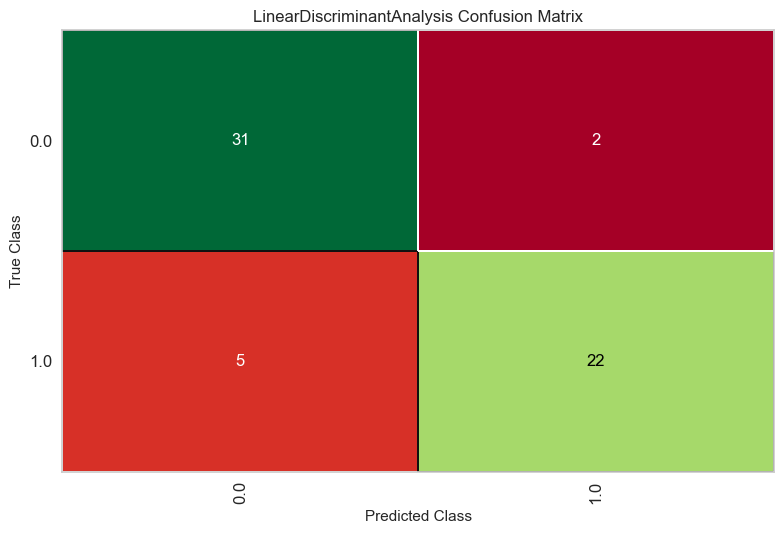

Accuracy: 0.8833333333333333
Precision: 0.9166666666666666
Recall: 0.8148148148148148
Roc AUC score: 0.9730639730639731


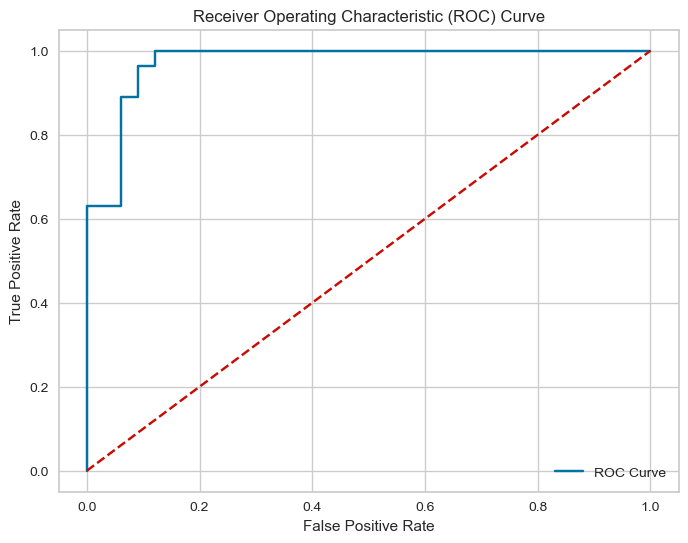

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90        36
         1.0       0.81      0.92      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



LinearDiscriminantAnalysis(solver='lsqr')

In [70]:
binary_classification(lda, X_train, y_train, X_test, y_test)

As it can be seen, the accuracy of the classification algorithm is 0.87, which is a fairly good value for a machine learning model. Moreover, the precision is 0.95, which is even higher. However, this value may be misleading, provided that it is based only on the true positives and the false positives (which is only 1). That is why several metrics must be obtained and used to complement, given that the false negatives represent the largest portion of errors, given a recall value of 0.74, which is a fairly low value. 

These results suggest that the model may not be generalizable enough, thus the relatively high errors or low performance scores. These results may suggest that LDA may not be the best classifier for the data under study. 


### **Naive bayes**

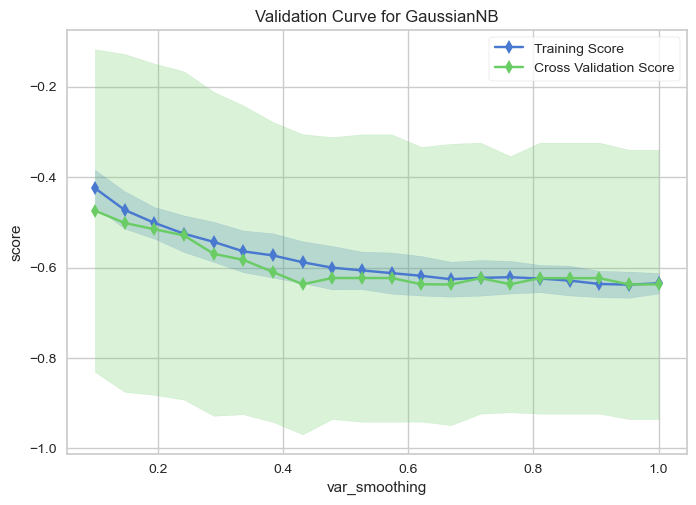

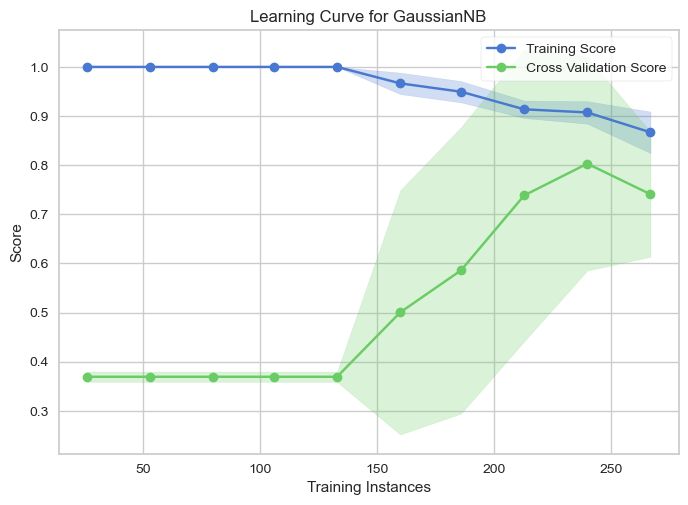

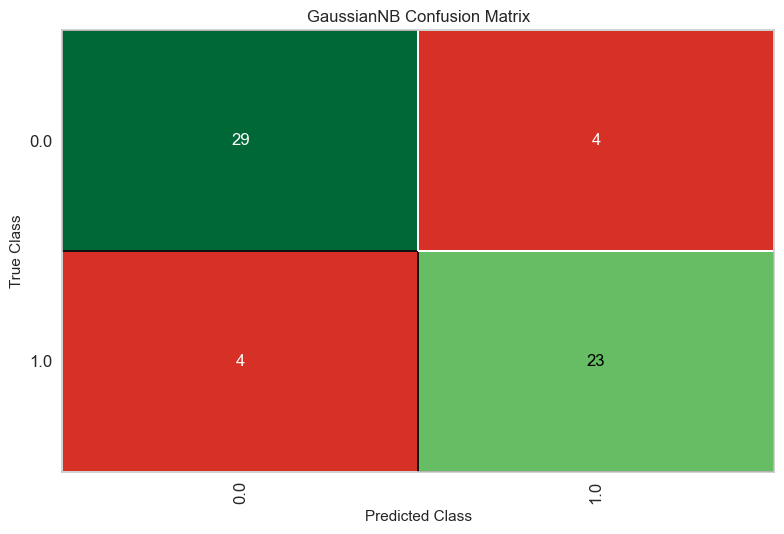

Accuracy: 0.8666666666666667
Precision: 0.8518518518518519
Recall: 0.8518518518518519
Roc AUC score: 0.9012345679012346


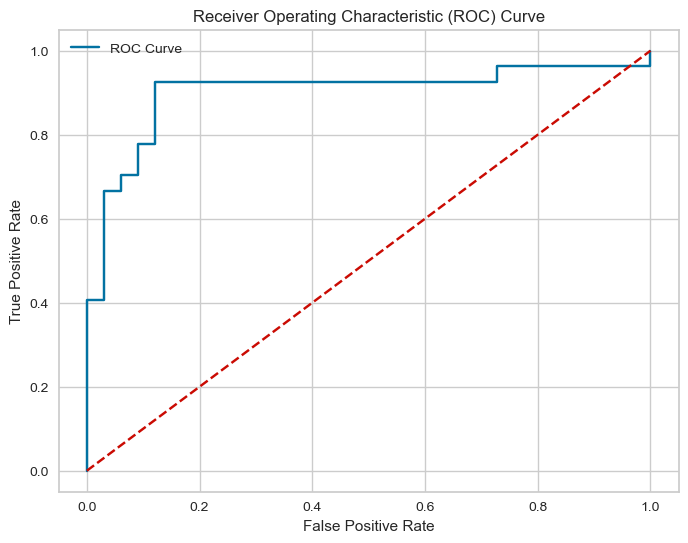

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        33
         1.0       0.85      0.85      0.85        27

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



GaussianNB()

In [71]:
gNB = GaussianNB()

study_model(gNB, X, y, 'var_smoothing',np.linspace(0.1, 1, 20))
binary_classification(gNB, X_train, y_train, X_test, y_test)

The validation curves for the Gaussian Naive Bayes where computed to assess the influence of the variable smoothing. It can be seen a similar tendency to the linear regression, but with a higher variance and lower values for score overall. Regarding the learning curve, it can be seen for the training score a decrease in score and an increase in variance. 

The learning curve has the same expected behavior as the one commented above, where a small number of instances leads to a poor performance on the validation set due to underfitting and high bias, up until around 130 samples that the performance on the test set starts to increase and the score of the training decreases. The best score for the test set is achieved at around 225 samples, where adding more instances no longer benefit both the training and the validation set due to overfitting. 

Regarding the metrics of the classification model, it can be seen that all metrics have similar values, given that the number of false positives and false negatives is very similar. Even though scores around 0.85 are fairly good results, this may also not be the best classifier for the data under study. 

### **Logistic regression**

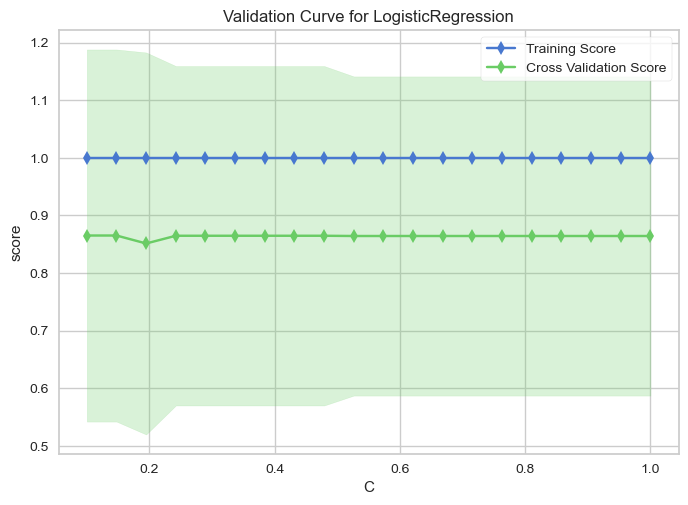

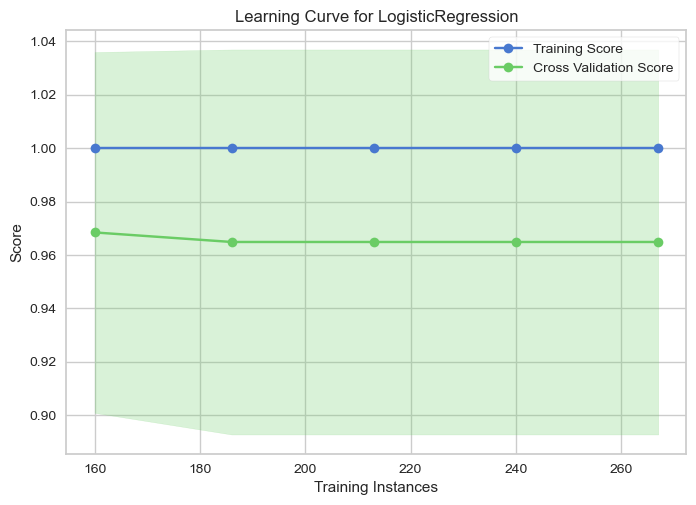

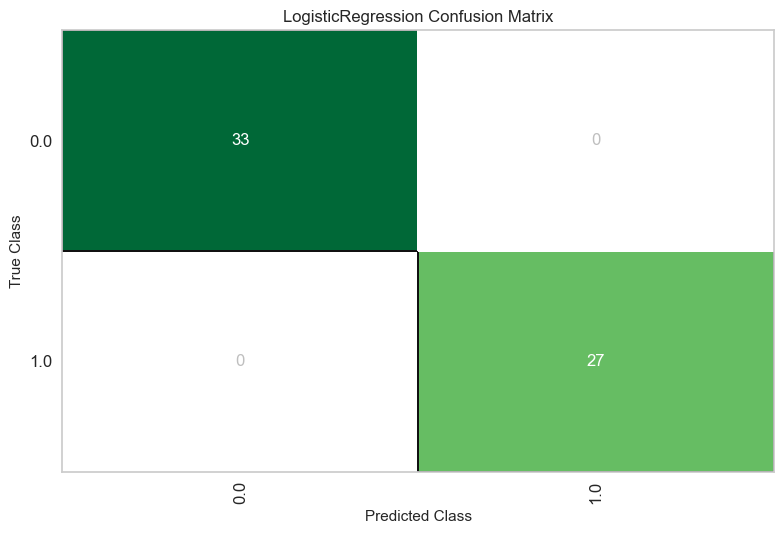

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc AUC score: 1.0


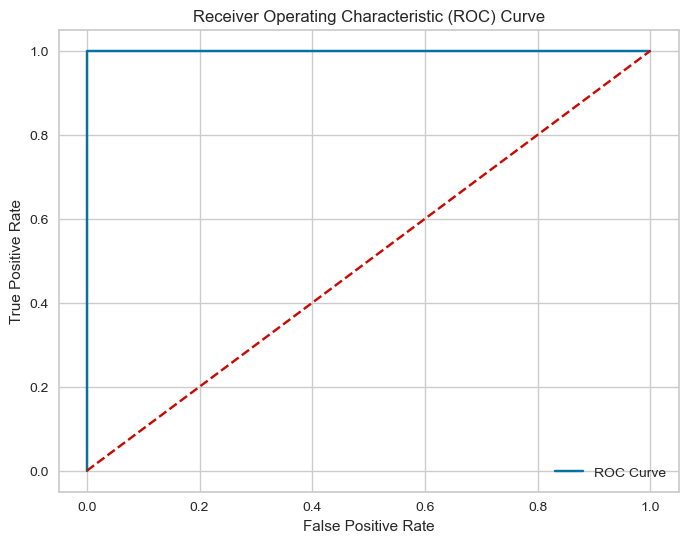

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



LogisticRegression(solver='liblinear')

In [96]:
lr = LogisticRegression(solver='liblinear')

study_model(lr, X, y, 'C',np.linspace(0.1, 1, 20))
binary_classification(lr, X_train, y_train, X_test, y_test)

It can be seen that the training score is not sensitive to the regularization strength hyperparameter or 'C', and the validation score has minimal changes as well. However, the variation on the cross validation score decrease, suggesting that higher values may be more adequate. 

The results obtained from this algorithm are not trustworthy, provided that the model did not converge to a solution. This could be attributed to the fact that Logistic regression may have trouble converging to a solution if there are many highly correlated inputs or if the input data has too many zero values. This can be checked by computing the correlation matrix between the input data parameters. 

In [97]:
X.corr().style.background_gradient(cmap='coolwarm')

As it can be seen, some of the parameters are strongly correlated between them, such as AGE1 and AGE2, or RAVLT0152 and RAVLT0752. This, added to the fact that some parameters did in fact contain zero values, could be the reason for the convergence issues. Therefore, the results obtained from the logistic regression will not be considered as trustworthy. 

### **KNN**

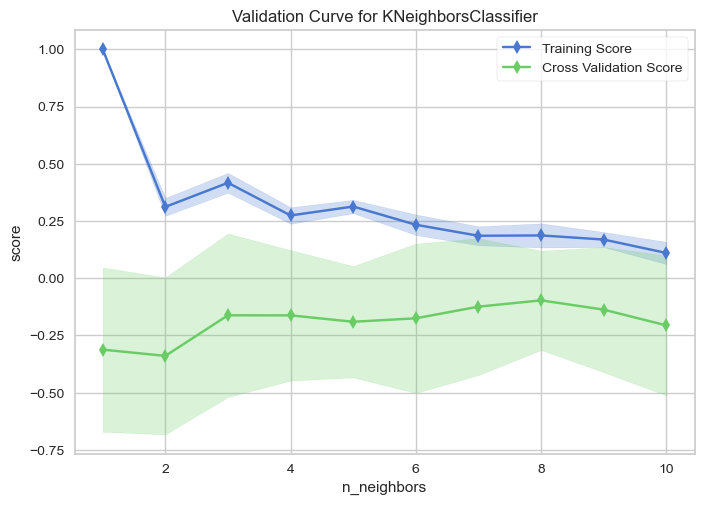

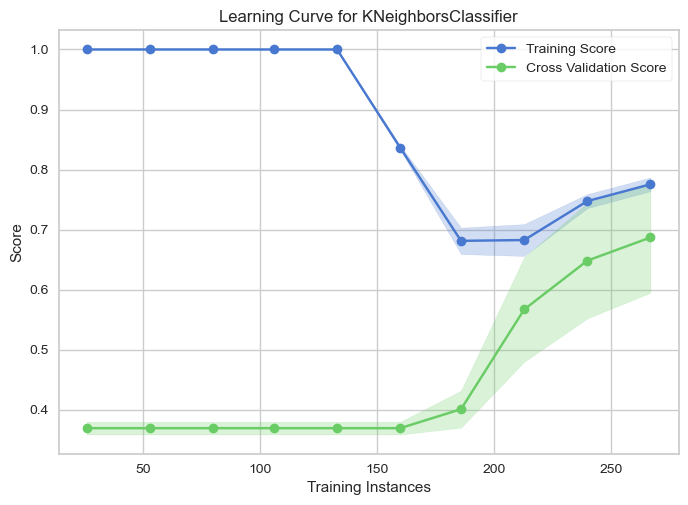

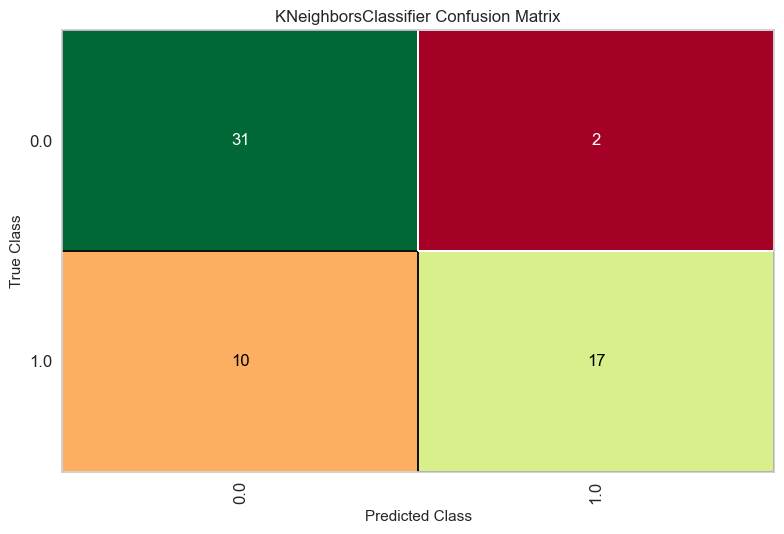

Accuracy: 0.8
Precision: 0.8947368421052632
Recall: 0.6296296296296297
Roc AUC score: 0.8035914702581369


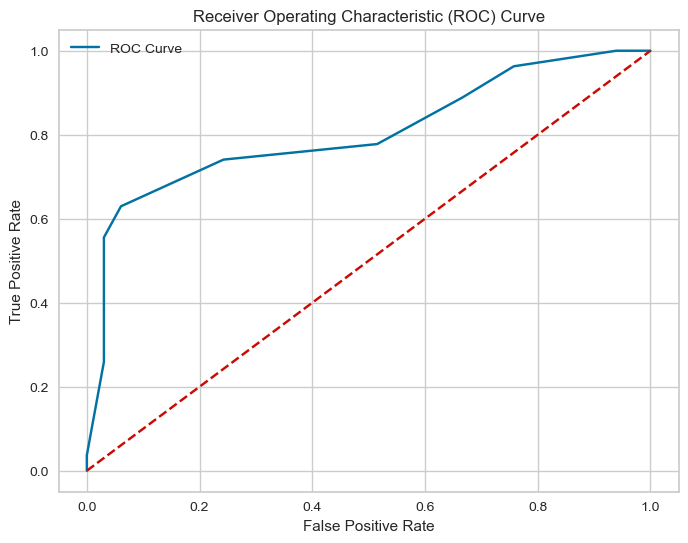

              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84        41
         1.0       0.63      0.89      0.74        19

    accuracy                           0.80        60
   macro avg       0.78      0.83      0.79        60
weighted avg       0.84      0.80      0.81        60



KNeighborsClassifier(n_neighbors=10)

In [98]:
knn = KNeighborsClassifier(n_neighbors=10)

study_model(knn, X, y, 'n_neighbors',np.arange(1, 11))
binary_classification(knn, X_train, y_train, X_test, y_test)

It can be seen that the number of neighbors increase the performance of the model, until around 3 that the score does not increase more. This means that the number of neighbors could be decreased, reducing the computational cost. However, it must be noted the differences between the training and the validation scores. This suggests that the model may be overfitted to the training data, since it does not generalize well to the validation data.

Regarding the learning curve, it can be seen that both scores could benefit from adding more instances, provided that the curves do not stabilize to a value. Therefore, it can not be ensured that the model reached the peak performance. 

### **Decision Tree**

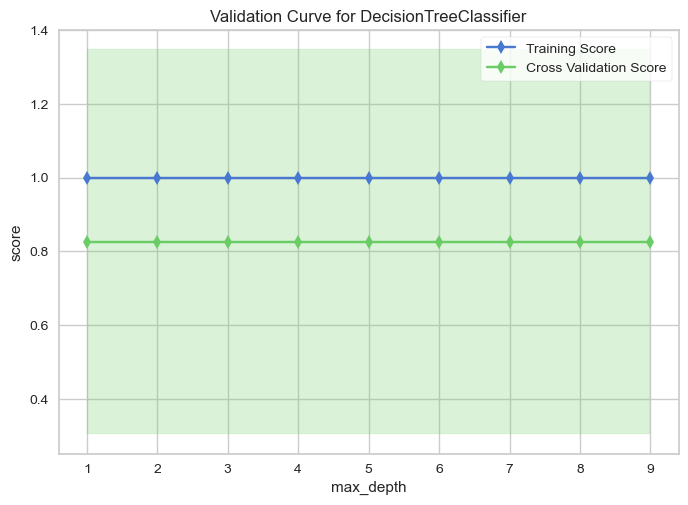

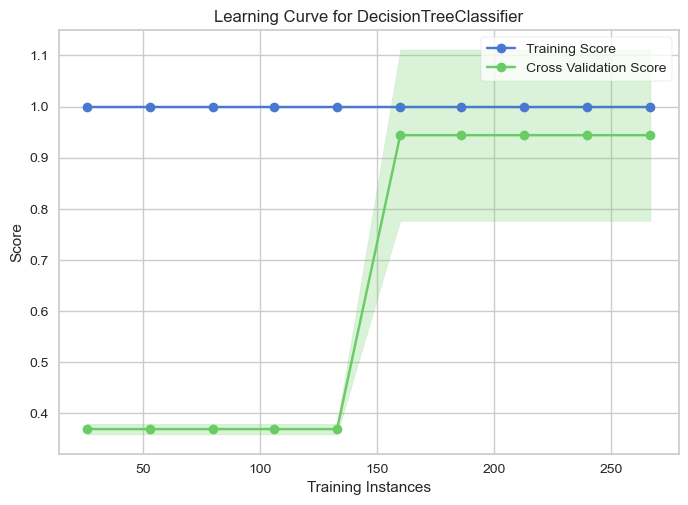

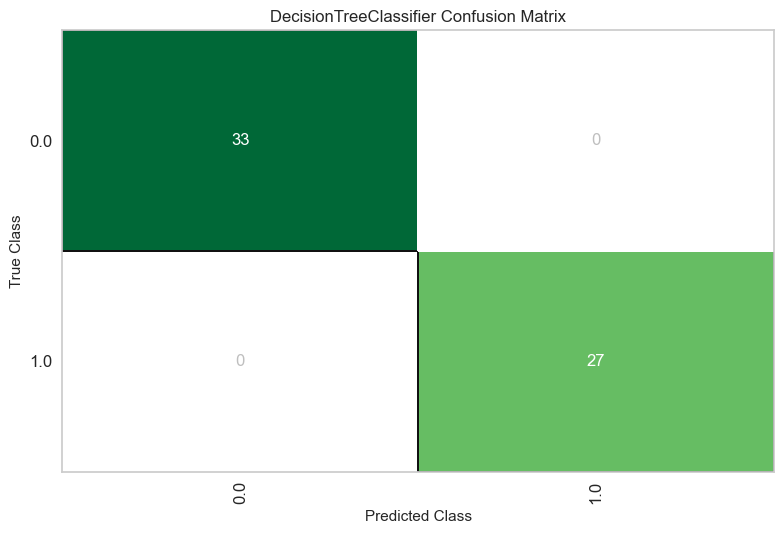

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc AUC score: 1.0


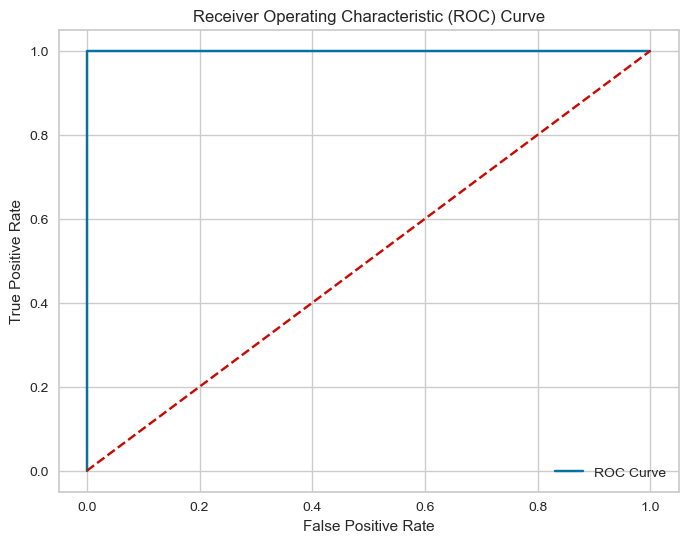

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



DecisionTreeClassifier(max_depth=3, random_state=42)

In [99]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

study_model(dt, X, y, 'max_depth',np.arange(1, 10))
binary_classification(dt, X_train, y_train, X_test, y_test)

### **Random Forest**

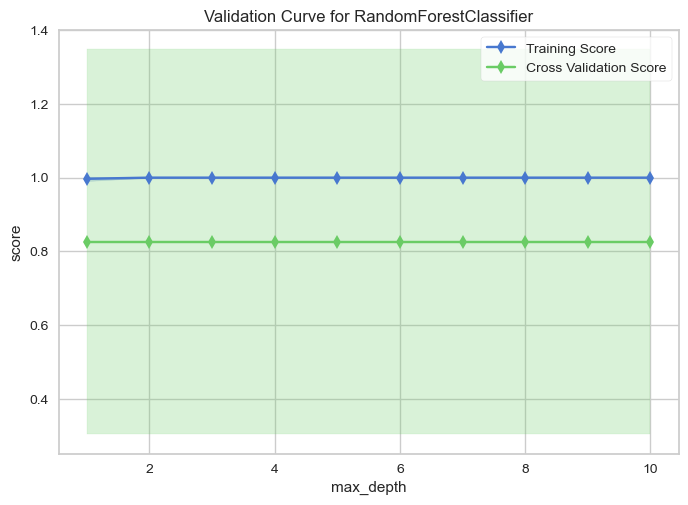

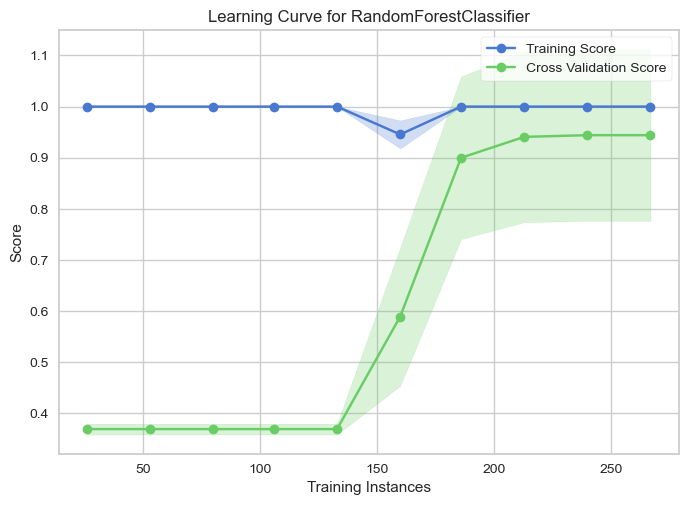

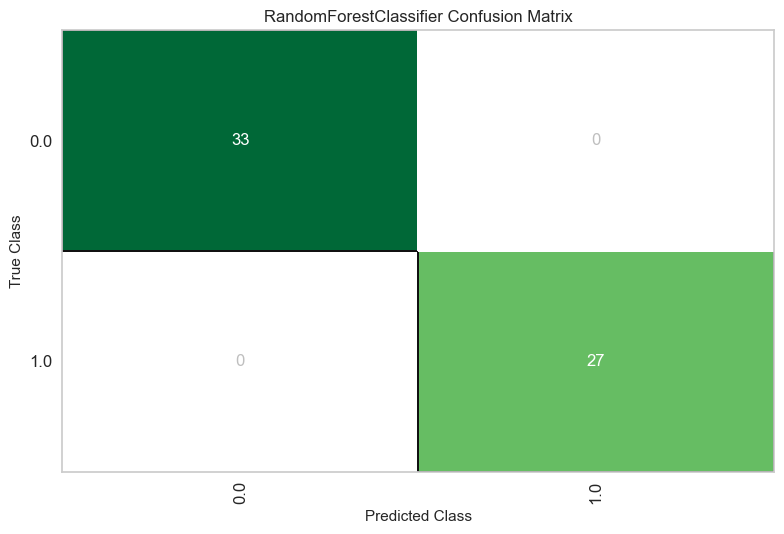

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc AUC score: 1.0


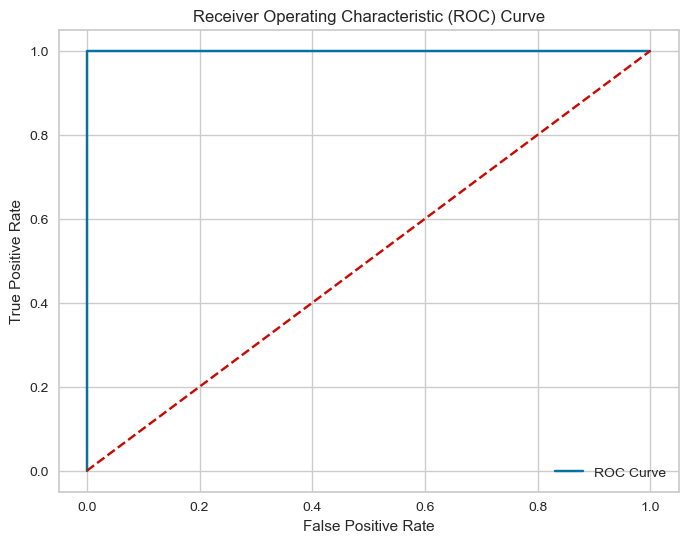

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



RandomForestClassifier(max_depth=2, random_state=0)

In [100]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

study_model(rf, X, y, 'max_depth',np.arange(1, 11))
binary_classification(rf, X_train, y_train, X_test, y_test)

Both the decision tree and the random forest have similar curves, where the maximum depth does not influence the score of the cross-validation score, that is already 1. This is due to the fact that during the training process the algorithm does not prune, leading to a perfect score.

Regarding the learning curves, they both increase up to a number of instances where adding more do not increase the model performance. Moreover, it must be noted that the algorithm does not tend to overfit after the best performance has been achieved. 

### **Support Vector Machine**

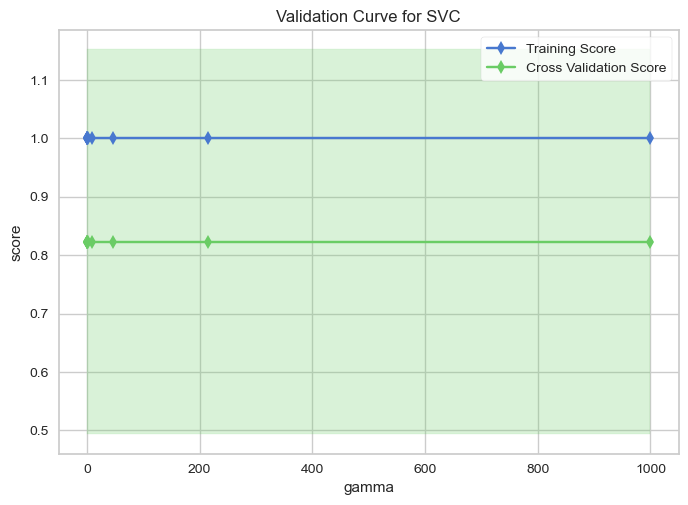

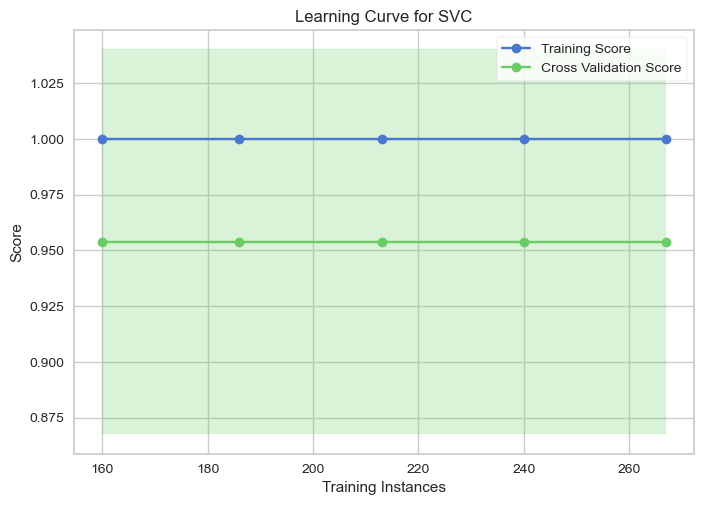

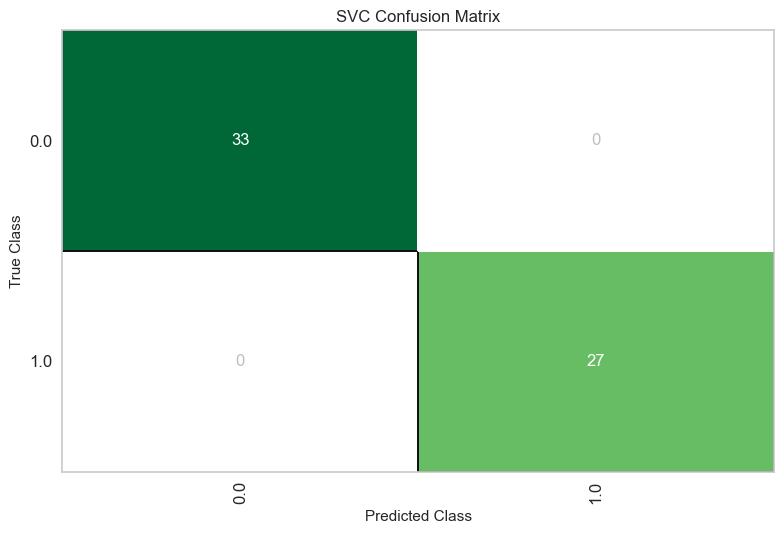

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Roc AUC score: 1.0


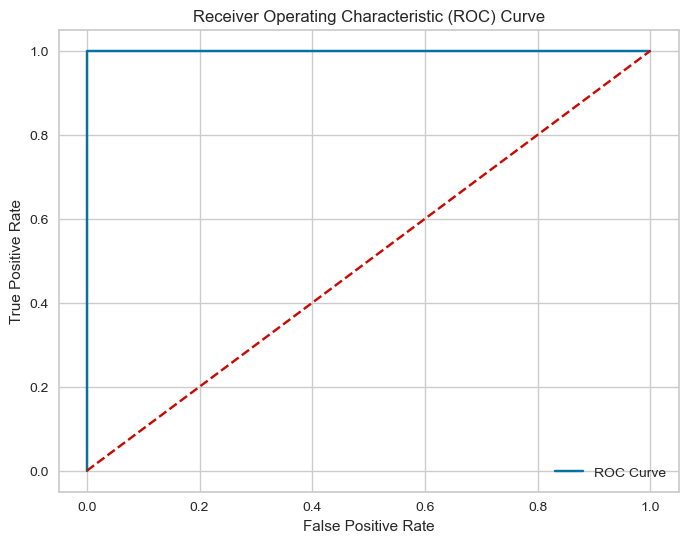

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        33
         1.0       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



SVC(kernel='linear', probability=True)

In [101]:
svm_ = SVC(kernel='linear',probability=True)

study_model(svm_, X, y, 'gamma',np.logspace(-3, 3, 10))
binary_classification(svm_, X_train, y_train, X_test, y_test)

It can be seen that the value of gamma does not affect the score of the model, which is a hyperparameter that defines the influence of a single training example. Regarding the learning curve, similar results to the previous models are achieved.

Regarding the perfomance between the different models, and assuming what it has been explained on the Logistic Regression section, it can be seen that the best performance is achieved with the decision tree, the random forest and SVM where all of the instances are classified correctly. Given that these three models are not linear, it can be said that to classify this data a non-linear boundary is needed. 

As it was seen with the learning curves, all of the models have sufficient data to have the optimal performance except for the KNN. Therefore, for KNN we can not ensure the best performance unless more data is used. 

<hr style="margin-top:0.5cm; margin-bottom:0.5cm; border-top: 9px double #BBDDBB; background-color: #FFF"></hr>
<h2 style="margin-top:0.5cm; margin-bottom:0.5cm; color: green">Exercise 4. Let's unbalance the problem</h2>

Using the 5-point improvement we are facing a fairly balanced problem. What if we want to predict if a patient will be able to achieve a 10-point improvement?

Use `pandas` to add this column to the dataset and use it as a target for the classification problem. Apply some of the previous models and comment on the results.

<div class="alert alert-block alert-danger">
This exercise is optional. If you do the previous three exercises correctly, it will not grant you a better score, but it will be taken into account, for sure!
</div>

In [ ]:
# Create a new column for IMP_GT10
df_data_stroke_filled['IMP_GT10'] = np.where(df_data_stroke_filled['IMP_RAVLT075'] >= 10, 1, 0)
df_data_stroke_filled

In [ ]:
print(df_data_stroke_filled['IMP_GT10'].value_counts())

As it can be seen for the improvement greater than 10 points the data is significantly unbalanced, so the obtained results will be affected. 

In [ ]:
# New target
y = df_data_stroke_filled['IMP_GT10']

# data
X = df_data_stroke_filled[['NTASKS', 'LOS', 'D2H', 'AGE1', 'AGE2', 'FEMALE', 'PO', 
             'SPO', 'TPO', 'LREP', 'LDEN', 'LUND', 'DIGMEM', 'RAVLT0751', 'RAVLT0151', 
             'RAVLT0752', 'RAVLT0152', 'FEPMR2']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes

In [ ]:
gNB = GaussianNB()

study_model(gNB, X, y, 'var_smoothing',np.linspace(0.1, 1, 20))
binary_classification(gNB, X_train, y_train, X_test, y_test)

The validation curve shows that both the training and validation scores follow a similar pattern with very low values, ranging from -0.5 to -0.4. The low scores suggest that the model is not performing well on both the training and validation sets. This could be due to underfitting, where the model is too simple to capture the underlying patterns in the data. The low variance and stabilization suggest that the model is consistent across different subsets of the data.

The learning curve displays a significant difference between the training and validation scores at the beginning because of overfitting. However, around 200 training instances, the training score falls to 0.52, coinciding with the validation score. This suggests that the model is starting to generalize better as it is trained on more data. After this point, both scores start to increase, but the training score remains higher. This could mean that the model continues to learn as more data is provided, but it still tends to overfit the training data.

Also, paying attention to the evaluation metrics, it is seen that the accuracy, precision, recall and Roc AUC score are considerably low, meaning that the model hasn't performed well.

### Logistic Regression

In [ ]:
lr = LogisticRegression(solver='newton-cg')

study_model(lr, X, y, 'C',np.linspace(0.01, 0.1, 20))
binary_classification(lr, X_train, y_train, X_test, y_test)

The validation curve shows that the training score progressively increases, indicating that the model is learning from the training data and improving its predictions. However, the cross-validation score decreases with some fluctuations, suggesting that the model’s performance on unseen data is deteriorating. The high variance indicates that the model’s performance is sensitive to the specific subsets of the data it’s trained on. This could be a sign of overfitting, where the model is too complex and is fitting the noise in the training data, leading to poor performance on the validation data.

The learning curve displays that the training score is initially perfect (1.0), but it decreases as more data is added. The validation score increases as more data is added, this suggests that the model is benefiting from more training data and is generalizing better to unseen data.

Having said that, and taking into account the evaluation metrics, which are highly positive, we could consider that this model performs well with the unbalanced data.

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

study_model(dt, X, y, 'max_depth',np.arange(1, 10))
binary_classification(dt, X_train, y_train, X_test, y_test)

The validation curve shows that the training score follows an exponential positive wave. This suggests that the model is perfectly fitting the training data, which could be a sign of overfitting. The cross-validation score increases slightly but with a lot of fluctuations, and its maximum value is truly low, indicating that the model is not generalizing well to unseen data. The high variance in the cross-validation score could be due to the model’s sensitivity to the specific subsets of the data it’s trained on.

The learning curve displays until around 155 instances trained the model is overfitting the data, after which the training score starts to increase until as more data is added and the validation score starts to decrease. This suggests that the model is starting to generalize better as it is trained on more data, and that the model is becoming less overfit as more data is added.

Regarding the evaluation metrics, all parameters seem to be good enough unless recall value, which is considerably low.
______________________

Based on the exhaustive evaluation of all models, Logistic Regression stands out as the best performer. Regarding the evaluation metrics, due to the significant consequences of false negatives, which could potentially deprive individuals of a 10-point improvement opportunity through training, we prioritize the recall parameter. Remarkably, Logistic Regression exhibits the highest recall rate among the models considered, affirming its capability to minimize false negatives and optimize predictive reliability.